# Lending Club Case Study

## .1 Problem Statement

_Leanding Club is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface._ 

 

_Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'._ 

 

_If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study._

 

_In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment_

_In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default._

_When a person applies for a loan, there are **two types of decisions** that could be taken by the company:_

1. **Loan accepted:** If the company approves the loan, there are 3 possible scenarios described below:
  * **Fully paid:** Applicant has fully paid the loan (the principal and the interest rate)
  * **Current:** Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
  * **Charged-off:** Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

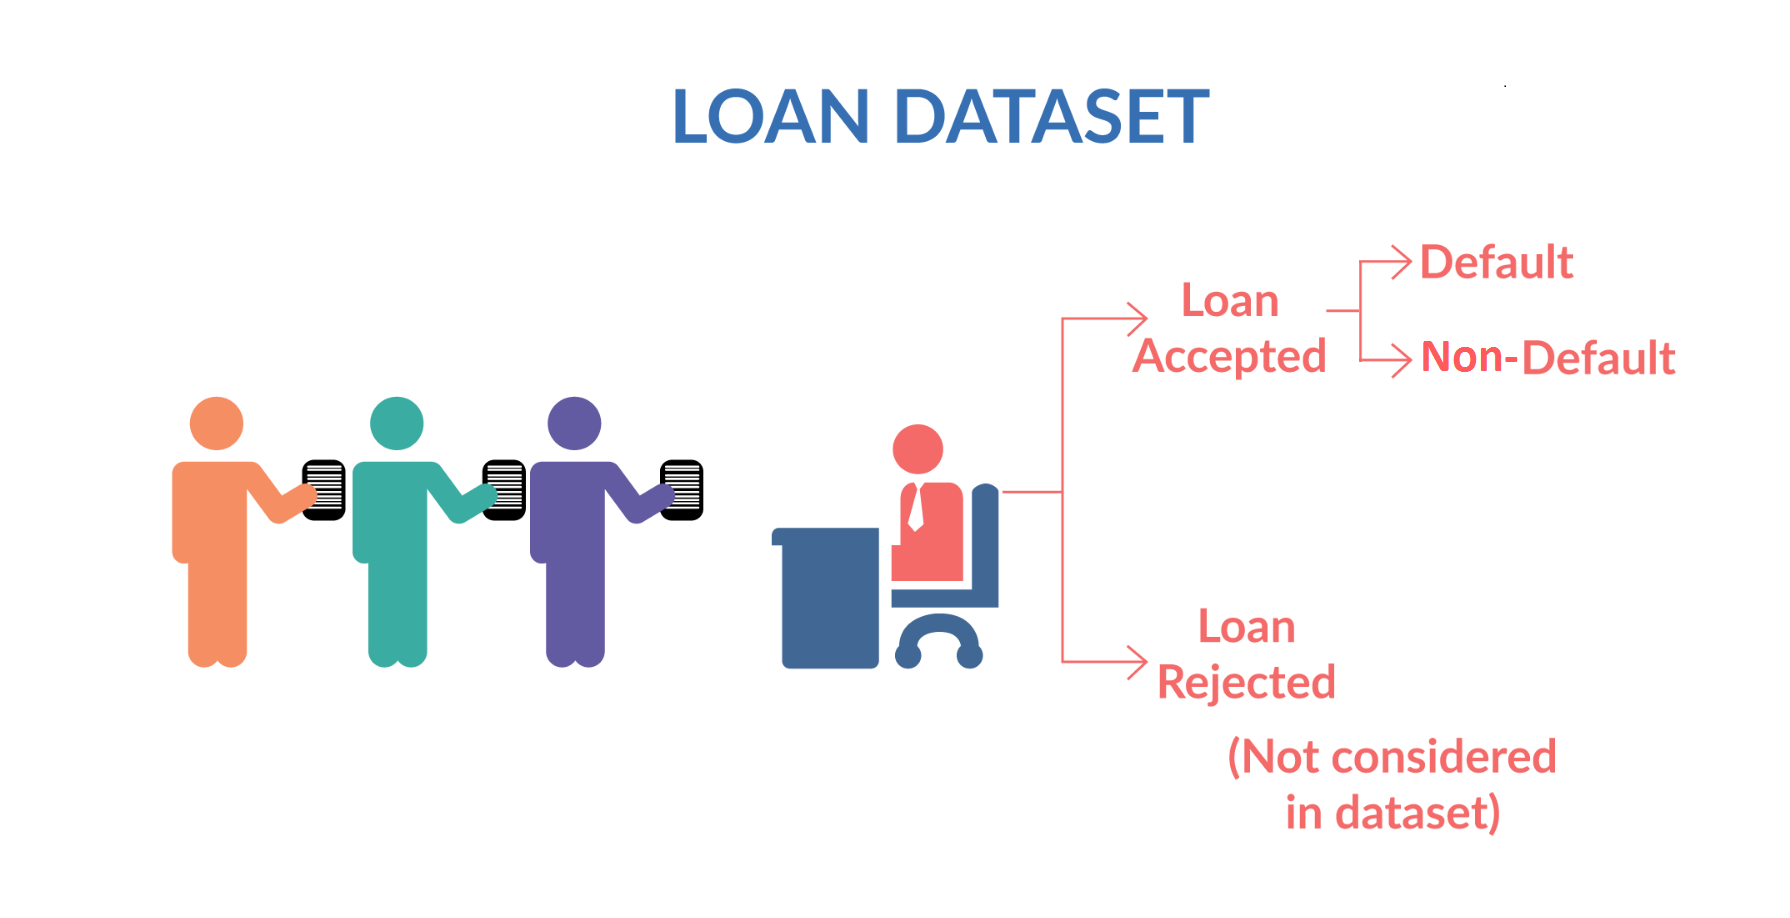

## 2. Objective

1. Understanding the dataset
2. Data Cleaning and Manipulation
3. Handling missing data & outliers
4. Data analysis
5. Presentation and Recommendations
6. Conciseness and readability of the code


# Imports and Initial Setup

In [303]:
# Importing core libraries required for the case study
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Setting max rows settings 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Suppress warnings
warnings.filterwarnings('ignore')

#Summarytool for quick EDA
from summarytools import dfSummary

# Load data from CSV

1. Use Pandas read_csv to open the CSV file
2. Check the total number of rows and columns using shape command
3. Find out the coulmns names using .columns

In [304]:
loan = pd.read_csv('/Users/atanu.dutta/Downloads/LendingClubCaseStudy/loan.csv')

In [305]:
loan.shape

(39717, 111)

### Observation
As we see there are total **111 columns**, lets check all the columns names and put it into List for ease of reading

In [306]:
list(loan.columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

Lets check the datatypes of each columns 

In [307]:
loan.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

Lets check top 5 rows of the data frame

In [308]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

# Read Data Dictionary file from excel

In [309]:
data_dict = pd.read_excel('/Users/atanu.dutta/Downloads/LendingClubCaseStudy/Data_Dictionary.xlsx')

In [310]:
data_dict.shape

(117, 2)

**Below Metadata Table will help us understand the definaiton of each columns in Loan File**

In [311]:
data_dict.head(117)

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


find details around number of columns & dtype summary

In [312]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [313]:
data_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LoanStatNew  115 non-null    object
 1   Description  116 non-null    object
dtypes: object(2)
memory usage: 2.0+ KB


Use describe to understand the basic stats around the dataset

In [314]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

# Use summarytools to understand the quick stats
It helps to understand the 
1. distribtuion of dataset 
2. Frequency to understand the uniqueness of distinst values 
3. Missing Values

In [315]:
dfSummary(loan)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,id[int64],Mean (sd) : 683131.9 (210694.1)min < med < max:54734.0 < 665665.0 < 1077501.0IQR (CV) : 321534.0 (3.2),"39,717 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACtUlEQVR4nO3du27iQBSA4TNLAHORLYQEHS+wEgWlH2Ifdh8hBU9AS0VngZAR3ngB462jJSG+refM/l8dhyl+mcEnGUye5wLY7lvbCwC+4qXtBdjKGDMQkV7Jyy95nr/VuZ7/HaE+YIwZTKfTH77vT8pcfzqdjsaYn8RaH0J9rOf7/iQMw7cgCNIiF8Zx7K3X68nhcOiJCKHWhFA/EQRBOpvNfhW9LssyX0R8Y0yZl2Xb8ACh1ixJku71el0uFotOp9MpdDcWYdvwEUKt2eVyefE8b7hardL5fH4sci3bho8RakNGo1GpbYOIDGpfjAN4jgoVCBUq8NbvGFcHFYTqEJcHFYTqFmcHFYTqoLKDCrH4iQOhWibLsq6Un2r59/u9W/OSvqzJ/TGhWqTqVOt6vXpZln1P0/RVRMrcUUtren9MqBapMtUSEdntdpPNZjO83W6dJtb3RKP7Y0K1UNmp1vF4bH2P2dT+mAf+UIFQoQKhQgVChQqEChUIFSo4+3iq4pSk1QkP/uZkqFWnJG1OePCYk6FKhSmJSOsTHjzgaqgiUn5KYsOEB+/xYQoqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFDB6X/uQzE2n3ZNqBAR+0+7JlSIiP2nXRMq3rH1tGs+TEEFQoUKhAoVCBUqECpUIFSoQKhQwernqBWON+doc8dYG2qV48052tw91oYqFY4352hz99gcqoiUO96co83dw4cpqNDoHZXvekJdGguV73pCnZ6GWuUR0Xg8noVheOK7nlDVp6HW8Yio3++/2vj3jdDl2R215/v+ZLlcymAw+F3kF+/3e2+73Q7jOB5FUXQpurDz+eyJiCRJ4kVRNPxX17b52lrXXfX6OI69Zz/zB6YSkxByCH5PAAAAAElFTkSuQmCC"">",0(0.0%)
2,member_id[int64],Mean (sd) : 850463.6 (265678.3)min < med < max:70699.0 < 850812.0 < 1314167.0IQR (CV) : 380559.0 (3.2),"39,717 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACfElEQVR4nO3cwYraQBjA8W+aVaJCggh68wUKPXj0IfqwfYQefALfwJsgEjHdYIzpobRsYat1kmHmm/3/zjuYw5+YiTufadtWgNB98n0BwP948X0BMTLGjERkaLn80rbta5/XEwNC7ZkxZjSbzb5mWTa1WX86nY7GmG/E+jdC7d8wy7Lper1+zfO8emZhURTpZrOZHg6HoYhYhRrr3ZxQHcnzvJrP5z8slo5sPzPmuzmhxsXr3dwlQo2Qj7u5a4QamKZpBiKSGWNslme3223Q8yUFgVADUpbloK7rL8vlMkmS5KmvbhGRuq7Tpmk+V1X1XURs7qiduNzIEWpALpfLS5qm49VqVS0Wi+Oz63e73XS73Y6v12vi4vrucb2RI9QATSYTq2fM4/Ho8xnT6UaOUNErVxs5fuuHCoQKFfjq/4cOO9hoXxH5RKjv6LKD9f2KKFaE+j7rHazPV0QxI9Q7bHawnl8RRYvNFFQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVOoeKPkGezEipEJPzZrIQKEQl/Nmu0oXacfvxh50eFOps1ylC7Tj9mflR4ogxVOsyOEmF+VIhiDVVE7KcfMz8qPEGHyoxS/BZsqMwoxVvBhirMKMUbIYcqIswoxS/81g8VCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVHD6Wz/HQdAXZ6FyHAR9cnlH5TgIeuP83/w4DoI+PAyV4yAIwd1QOQ6CUDy6o3IcBEFw/oxalmW63+/Hz647n8+p7foua31+ttbr7rq+KIr00d/8BJowlD1QmcCBAAAAAElFTkSuQmCC"">",0(0.0%)
3,loan_amnt[int64],Mean (sd) : 11219.4 (7456.7)min < med < max:500.0 < 10000.0 < 35000.0IQR (CV) : 9500.0 (1.5),885 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACp0lEQVR4nO3cTY7aMBiA4c9lgPCjRAgJdlygUhcsc4getkeYBSfgBuyQEAoinYjw003b1WgG7Lh8X/o++4RI84rBjm13u90E0O7Lsx8AuMdLzJs75wYi0gu4xel2u7019TywK1qozrnBdDr9nqbpxPceh8Nh75z7QayI+Y3aS9N0kuf5W5Zl1aMXF0WRrFaryW6364kIof7nov7rFxHJsqyazWY/PS8fNPowMIvBFEwgVJhAqDCBUGECocIEQoUJhAoTCBUmRJ/wD3G5XLoikjrnfC5nnUCLqA21LMtuXdffFotFp9PpPPwKlnUC7aI21NPp9JIkyXC5XFbz+Xz/yLWsE2gftaH+MRqNfNcKsE6gRRhMwQRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJhAoTCBUmECpMIFSYQKgwgVBhgvqF074C91uJsOdKlU9DDTiMN71er12P64KF7rcSYc+VNh+GGnIYb13XyeVy+VpV1auI+B476SVkv5UIe640+uwb1fsw3s1mM1mv18Pz+dwJeL4gAfutRNhzpcpdv1F9DuPd7/f8odEYRv0wgVBhQmunp0JxnJAuhPoOjhPSh1DfwXFC+hDqBzhOSA8GUzCBUGECocIEfqNGwNRW8wi1YUxtxUGoDWNqKw5CjYSprWYxmIIJhAoTCBUmECpMIFSYwKi/ZQJ2DYsoftlAqC0SsmtYRPfLBkJtF+9dw9pfNhBqC/nsGv5N7csGQlUmcEHL006niY1QFQld0PLM02liI1RFQo8i0nA6TSyEqpDvgpZnn04Tc2qMUNGI2FNjhIq/Qgdy4/F4luf5IcbUGKFCRJobyPX7/dcYU2OEChHRP5C7K9SiKJJHb3w8HhMRkbIsk+12O/yX11v9bA3PHcrns+/p6xdDfLD4QerBXQAAAABJRU5ErkJggg=="">",0(0.0%)
4,funded_amnt[int64],Mean (sd) : 10947.7 (7187.2)min < med < max:500.0 < 9600.0 < 35000.0IQR (CV) : 9

# Data Cleaning and Manipulation

### 1. Review Columns for Nulls
In below section
1. We are first finding out how many rows within each column is null
2. then dividing it with the total lenght of the dataframe to covert it into percentage

### Once we identify list of columns which has more than 95% of values as null. We can plan to drop those columns

In [316]:
round(loan.isnull().sum()/loan.shape[0]*100)

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


In [317]:
column_list = round(loan.isnull().sum()/loan.shape[0]*100) 

In [318]:
drop_column_list = column_list[column_list > 95].index.to_list()

In [319]:
np.array(drop_column_list)

array(['next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'tot_coll_amt',
       'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
       'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats',
       'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
       'num_tl_op_pa

### Decision

We can drop following 55 columns, which will not add any value to EDS

*['next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'tot_coll_amt',
       'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
       'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats',
       'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
       'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit']*

In [320]:
len(drop_column_list)

55

### Observation
* As we noticed **total 54 columns are null and 1 column next_pymnt_d has 97% values as null**
* Hence, **dropping** those columns as it will be not be required in our EDA

In [321]:
loan.drop(columns = drop_column_list,inplace = True)

In [322]:
loan.shape

(39717, 56)

#### Check 
* Identify list of column which have **unique values equal to total number of rows in datafile**
* check dictionary file to understand if those columns will add any values to EDA, if not then we can drop them

In [323]:
unique_column = (loan.nunique() == loan.shape[0])

In [324]:
unique_column_delete = unique_column[unique_column == True].index.to_list()

In [325]:
unique_column_delete

['id', 'member_id', 'url']

### Observation
* As we noticed **total 3 columns** namely **['id', 'member_id', 'url']** have 39717 unique values 
* Hence, they will not helpful for any analysis to drive any conclusion
* So, we will delete them

In [326]:
loan.drop(columns = unique_column_delete, inplace=True)

In [327]:
loan.shape

(39717, 53)

In [328]:
#Finding number of unique values in each columns
loan.nunique().sort_values().head(15)

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
pymnt_plan                    1
policy_code                   1
initial_list_status           1
collections_12_mths_ex_med    1
term                          2
loan_status                   3
verification_status           3
pub_rec_bankruptcies          3
pub_rec                       5
home_ownership                5
dtype: int64

In [329]:
attr_only_one_val = loan.nunique() == 1

In [330]:
attr_only_one_val_del = attr_only_one_val[attr_only_one_val == True].index.to_list()

Delete following columns
['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [331]:
#Delete the columns which has only One unique value as it won't help in EDA
loan.drop(columns = attr_only_one_val_del,inplace = True)

### Observation
* As we noticed **total 9 columns **namely *['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']* has only **ONE unique values**
* Hence, they will not helpful for any analysis to drive any conclusion
* So, we will delete them

In [332]:
loan.shape

(39717, 44)

In [333]:
#delete the Text Desc columns as it won't help in EDA
loan.nunique().sort_values().tail(15)

collection_recovery_fee     2616
dti                         2868
recoveries                  4040
annual_inc                  5318
total_rec_prncp             7976
funded_amnt_inv             8205
installment                15383
title                      19615
revol_bal                  21711
desc                       26527
emp_title                  28820
last_pymnt_amnt            34930
total_rec_int              35148
total_pymnt_inv            37518
total_pymnt                37850
dtype: int64

In [334]:
loan.desc.value_counts().head(5)

                             210
Debt Consolidation             8
Camping Membership             6
personal loan                  3
credit card consolidation      3
Name: desc, dtype: int64

In [335]:
loan.drop(columns = ['desc'],inplace =True)

### Observation
1. Desc field has text value which are very unique in nature and might not be required

In [336]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [337]:
# Check if any column has high percentage of null/na
round(loan.isna().sum()/loan.shape[0]*100).sort_values(ascending = False).head(5)

mths_since_last_record    93.0
mths_since_last_delinq    65.0
emp_title                  6.0
emp_length                 3.0
pub_rec_bankruptcies       2.0
dtype: float64

In [338]:
loan.drop(columns = ['mths_since_last_record','mths_since_last_delinq'],inplace =True)

### Obervation
1. Delete the **two columns mths_since_last_record & mths_since_last_delinq** which has **high percentage of null**

In [339]:
# Drop all columns which are not available at time of Load Approval & are generated later on 
loan = loan.drop(['delinq_2yrs', 'earliest_cr_line', 
                          'inq_last_6mths', 'open_acc', 'pub_rec', 
                          'revol_bal', 'revol_util', 'total_acc', 
                          'out_prncp', 'out_prncp_inv', 'total_pymnt', 
                          'total_pymnt_inv', 'total_rec_prncp', 
                          'total_rec_int', 'total_rec_late_fee', 'recoveries', 
                          'collection_recovery_fee', 'last_pymnt_d', 
                          'last_pymnt_amnt', 'last_credit_pull_d'],  axis=1)

#### Drop all columns which are not available at time of Load Approval & are generated later on 

In [340]:
#Check if we have any duplicate rows in dataset
len(loan[loan.duplicated()])

0

# Data Conversion

In [341]:
loan.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [342]:
loan.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [343]:
# The rows where loan_status=Current are the data where the loan repayment is currently in progress
# The loans which are currently in progress will not contribute to decisions
loan = loan[loan.loan_status != 'Current']

#### Decision 
Delete the loan status = Current as it will not contribute to any decisions

In [344]:
# Checking samle values for Term
loan.term.value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [345]:
#Converting the loan Term to Integer
loan.term = loan.term.apply(lambda x: int(x[:-7]))
loan.term.value_counts()

36    29096
60     9481
Name: term, dtype: int64

In [346]:
#Checking sample values for Int Rate
loan.int_rate.value_counts().head(5)

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
Name: int_rate, dtype: int64

In [347]:
# Removing the % sign from the int_rate
loan.int_rate = loan.int_rate.str.replace('%','').astype(float)

In [348]:
loan.funded_amnt_inv.value_counts().head()

5000.0     1294
10000.0    1264
6000.0     1182
12000.0    1016
8000.0      887
Name: funded_amnt_inv, dtype: int64

In [349]:
#round off the numbers to two decimals
loan.funded_amnt_inv = loan.funded_amnt_inv.apply(lambda x: round(x,2))

In [350]:
loan.issue_d.value_counts().head()

Nov-11    2062
Dec-11    2042
Oct-11    1941
Sep-11    1913
Aug-11    1798
Name: issue_d, dtype: int64

In [351]:
#Convert issue_d to datetime
loan.issue_d = pd.to_datetime(loan.issue_d,format='%b-%y')

In [352]:
loan.issue_d.value_counts().head()

2011-11-01    2062
2011-12-01    2042
2011-10-01    1941
2011-09-01    1913
2011-08-01    1798
Name: issue_d, dtype: int64

In [353]:
loan.dtypes

loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                             int64
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
pub_rec_bankruptcies           float64
dtype: object

In [354]:
loan.int_rate.value_counts().head()

10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
Name: int_rate, dtype: int64

# Derived Variables

In [355]:
# issue_d column
loan['issue_d_year'] = loan.issue_d.dt.year
loan['issue_d_month'] = loan.issue_d.dt.strftime('%b')

In [356]:
# Load Amount Ratio
loan['approved_loan_amnt_ratio'] = round(loan.funded_amnt_inv*100/loan.loan_amnt,2)

In [357]:
loan.loan_amnt.describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [358]:
#Bucketting the Load amount with values less than 25% percentile, mean & 75% percentile
loan['loan_amnt_bucket'] = loan.loan_amnt.apply(lambda x: '0-5K' if x <=5000 
                                             else '5-10K' if (x >5000 and x<=10000) 
                                             else '10-15K' if (x >10000 and x<=15000) 
                                             else '15 & adove' 
                                            )

In [359]:
loan.loan_amnt_bucket.value_counts()

5-10K         12802
0-5K           9472
15 & adove     8620
10-15K         7683
Name: loan_amnt_bucket, dtype: int64

In [360]:
loan.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [361]:
loan.emp_length.mode()

0    10+ years
Name: emp_length, dtype: object

In [362]:
# Converting it into integer, so that if required can do any greater than or less than operation
loan['loan_length'] = loan.emp_length.replace({'< 1 year':0,
                                               '1 year':1,
                                               '2 years':2,
                                               '3 years':3,
                                               '4 years':4,
                                               '5 years':5,
                                               '6 years':6,
                                               '7 years':7,
                                               '8 years':8,
                                               '9 years':9,
                                               '10+ years':10}
                                              )

In [363]:
# find out how much percentage of loan length is NaN
(loan.emp_length.isna().sum())/(loan.emp_length.size)*100

2.6777613603960906

In [364]:
loan.loan_length.size

38577

In [365]:
loan.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [366]:
loan.int_rate.describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

In [367]:
loan['int_rate_bin'] = pd.qcut(loan['int_rate'], q=[0,.25,0.5, 0.75,0.90, 0.99])
loan.groupby('int_rate_bin').agg({'int_rate':['mean','size']})

int_rate      
                     mean  size
int_rate_bin                   
(5.419, 8.94]    7.263708  9808
(8.94, 11.71]   10.647951  9509
(11.71, 14.38]  13.059003  9617
(14.38, 16.82]  15.583538  5888
(16.82, 20.99]  18.443524  3414

In [368]:
loan.drop(columns = 'int_rate_bin',inplace = True)
loan['int_rate_bucket'] = loan['int_rate'].apply(lambda x: 'Low Interest Rate' if x <= 7.5 
                                                 else 'Medium Interest Rate' if x >7.5 and x <=13
                                                 else 'High Intest Rate')

In [369]:
loan['int_rate_bucket'].value_counts()

Medium Interest Rate    18628
High Intest Rate        14579
Low Interest Rate        5370
Name: int_rate_bucket, dtype: int64

In [370]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'pub_rec_bankruptcies', 'issue_d_year', 'issue_d_month',
       'approved_loan_amnt_ratio', 'loan_amnt_bucket', 'loan_length',
       'int_rate_bucket'],
      dtype='object')

# Univariate Analysis

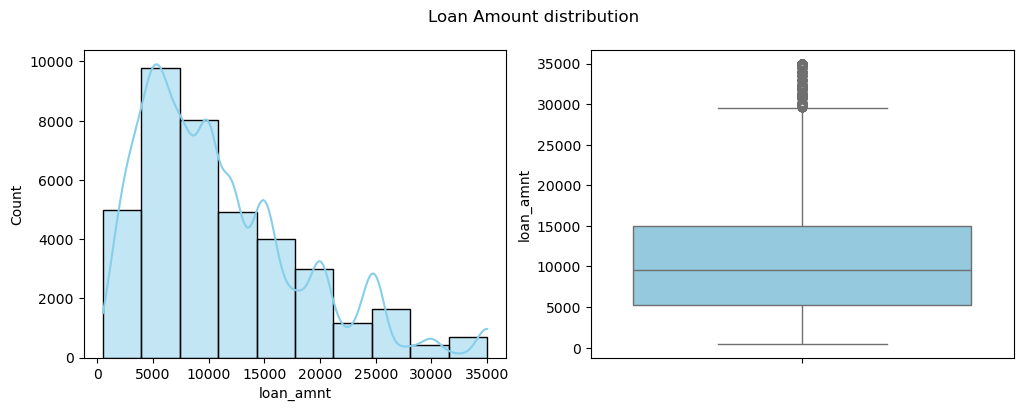

In [371]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.histplot(loan.loan_amnt,kde=True, color='skyblue',bins = 10)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=loan.loan_amnt,color='skyblue')
#Single title for both subplots.

plt.suptitle('Loan Amount distribution')
plt.show()

<AxesSubplot:xlabel='loan_amnt_bucket', ylabel='loan_amnt'>

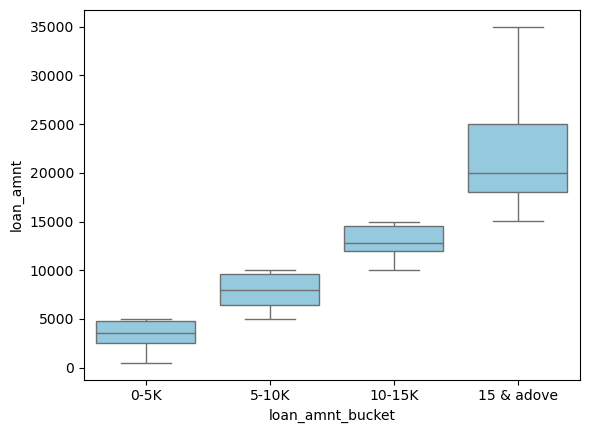

In [372]:
sns.boxplot(data = loan, x = 'loan_amnt_bucket', y = 'loan_amnt', color='skyblue')

In [373]:
loan.loan_amnt.quantile([.1,.25,0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.10     3090.0
0.25     5300.0
0.50     9600.0
0.75    15000.0
0.90    21600.0
0.95    25000.0
0.97    28000.0
0.98    30000.0
0.99    35000.0
Name: loan_amnt, dtype: float64

In [374]:
loan[loan.loan_amnt > 30000].size

19845

In [375]:
loan[loan.loan_amnt <= 30000].size

1021734

In [376]:
loan['loan_amnt_bin'] = pd.qcut(loan['loan_amnt'], q=[0, .1,.25,0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
#labels=['Q1', 'Q2', 'Q3', 'Q4']
loan.groupby('loan_amnt_bin').agg({'loan_amnt':['mean','sum','count','size']}).transform(lambda x: round(x / x.sum()*100)).reset_index()

loan_amnt_bin loan_amnt                  
                           mean   sum count  size
0   (499.999, 3090.0]       1.0   2.0  10.0  10.0
1    (3090.0, 5300.0]       3.0   6.0  15.0  15.0
2    (5300.0, 9600.0]       5.0  17.0  25.0  25.0
3   (9600.0, 15000.0]       8.0  30.0  28.0  28.0
4  (15000.0, 21600.0]      11.0  21.0  12.0  12.0
5  (21600.0, 25000.0]      15.0  14.0   6.0   6.0
6  (25000.0, 28000.0]      17.0   2.0   1.0   1.0
7  (28000.0, 30000.0]      19.0   3.0   1.0   1.0
8  (30000.0, 35000.0]      22.0   6.0   2.0   2.0

<AxesSubplot:xlabel='None-None', ylabel='loan_amnt_bin'>

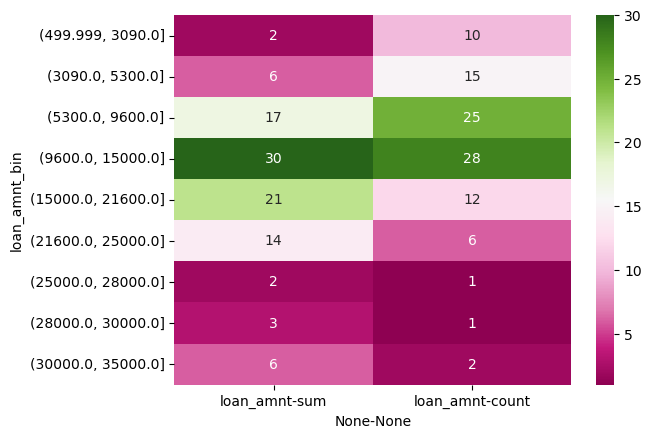

In [377]:
sns.heatmap(loan.groupby('loan_amnt_bin').agg({'loan_amnt':['sum','count']}).transform(lambda x: round(x / x.sum()*100))
           ,cmap='PiYG',annot=True)

In [378]:
loan.drop(columns = 'loan_amnt_bin',inplace=True)

### Observation 
1. More number of people have taken loan in range of 10K as mean is 9600
2. Also, sum total of loan amount is high in range of 9600 to 15000
3. Very less percentage of people have taken loan amount more than 30K

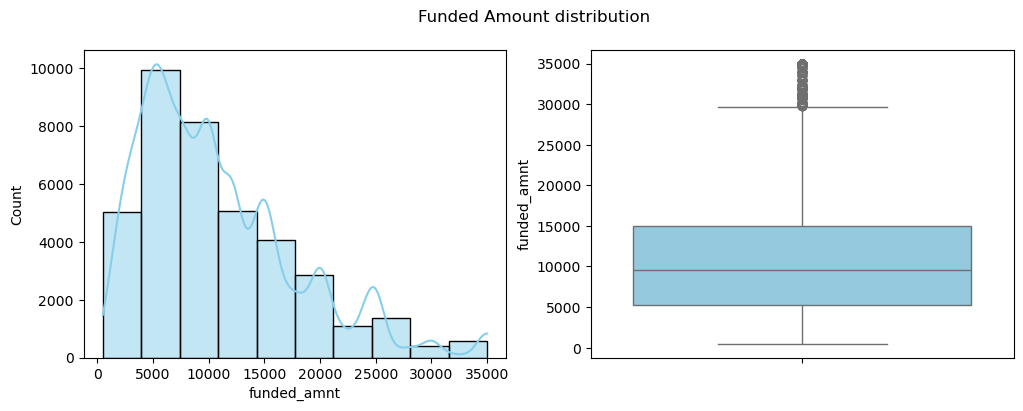

In [379]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.histplot(loan.funded_amnt,kde=True, color='skyblue',bins = 10)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=loan.funded_amnt,color='skyblue')
#Single title for both subplots.

plt.suptitle('Funded Amount distribution')
plt.show()

### Observation 
1. behavious of funded_amnt is same as loan_amnt

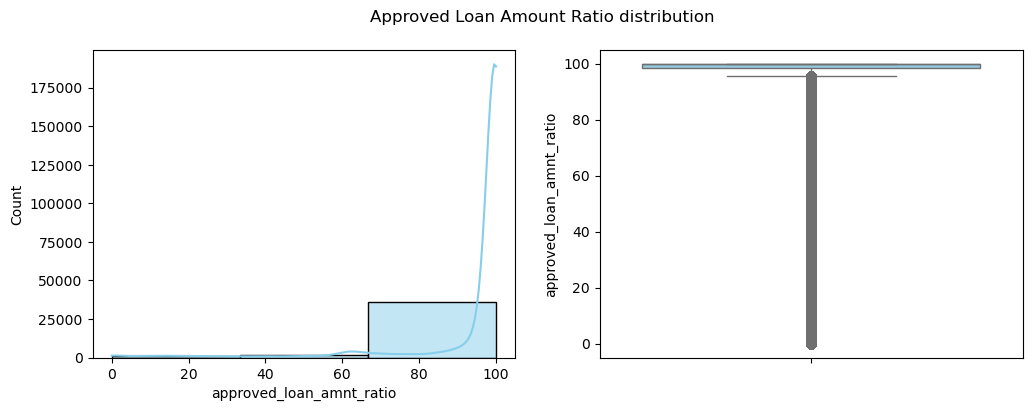

In [380]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.histplot(loan.approved_loan_amnt_ratio,kde=True, color='skyblue',bins = 3)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=loan.approved_loan_amnt_ratio,color='skyblue')
#Single title for both subplots.

plt.suptitle('Approved Loan Amount Ratio distribution')
plt.show()

In [381]:
loan.approved_loan_amnt_ratio.describe()

count    38577.000000
mean        93.787685
std         17.331127
min          0.000000
25%         98.250000
50%         99.930000
75%        100.000000
max        100.000000
Name: approved_loan_amnt_ratio, dtype: float64

In [382]:
# Function to find at what percentile level all approval loan amount becomes 100%
def find_percentilefor100(df, column_name, input_value):
    target_value = input_value
    while True:
        percentile = np.percentile(df[column_name], target_value)
        
        # Check if the percentile is 100
        if percentile == 100:
            break  # Exit when its 100
        
        # Increment the target value for the next iteration
        target_value += 1

    return target_value

In [383]:
target = 50
find_percentilefor100(loan,'approved_loan_amnt_ratio',target)

51

### Observation
51 percentile of loan applicant loan amount is 100% approved 

In [384]:
loan.int_rate.describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

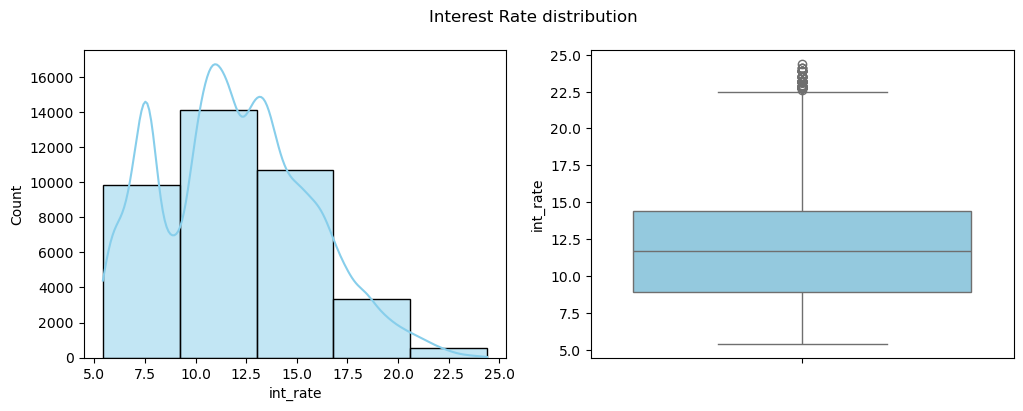

In [385]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.histplot(loan.int_rate,kde=True, color='skyblue',bins = 5)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=loan.int_rate,color='skyblue')
#Single title for both subplots.

plt.suptitle('Interest Rate distribution')
plt.show()

### Observations:
From the above 2 plots and statistics of interest rates we can conclude that most of the interest rates lies between **9% to 14.5%** Some people took loan at higher rates of interest, **22.5%**

In [386]:
loan.installment.describe()

count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64

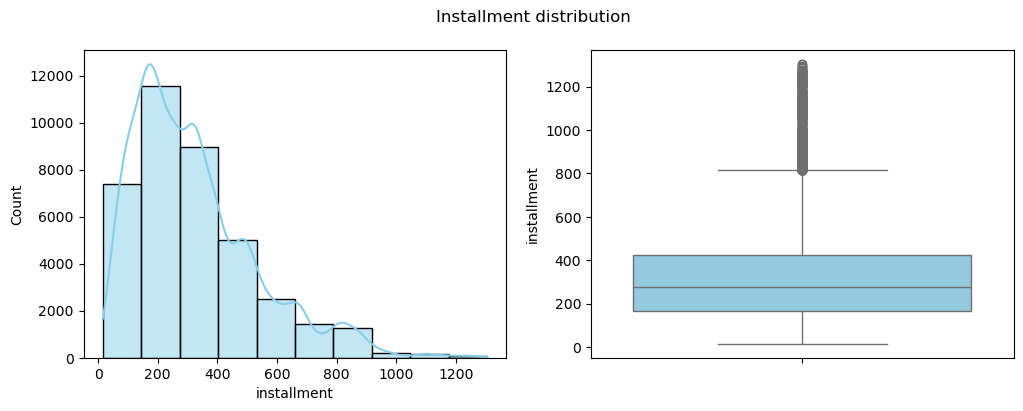

In [387]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.histplot(loan.installment,kde=True, color='skyblue',bins = 10)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=loan.installment,color='skyblue')
#Single title for both subplots.

plt.suptitle('Installment distribution')
plt.show()

### Observations:
Mostly people have taken installment of 277 months means 23 Years, we see many outliers like 800+ which means more than 66 years

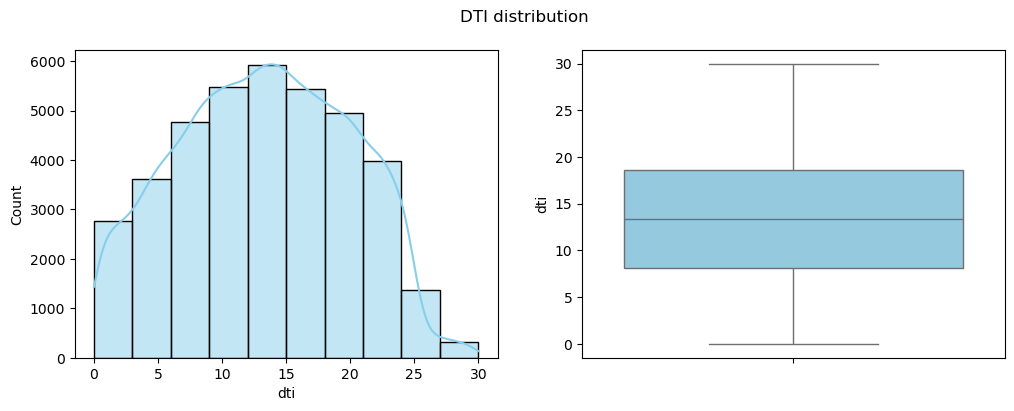

In [388]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.histplot(loan.dti,kde=True, color='skyblue',bins = 10)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=loan.dti,color='skyblue')
#Single title for both subplots.

plt.suptitle('DTI distribution')
plt.show()

### Observation
There are no outlier in DTI and it looks like normal distribution curve. Means loans are given to people with good DTI ration 

In [389]:
loan.pub_rec_bankruptcies.value_counts(normalize =True)*100

0.0    95.665259
1.0     4.321542
2.0     0.013200
Name: pub_rec_bankruptcies, dtype: float64

### Observation
96% have not gone bankrupt 

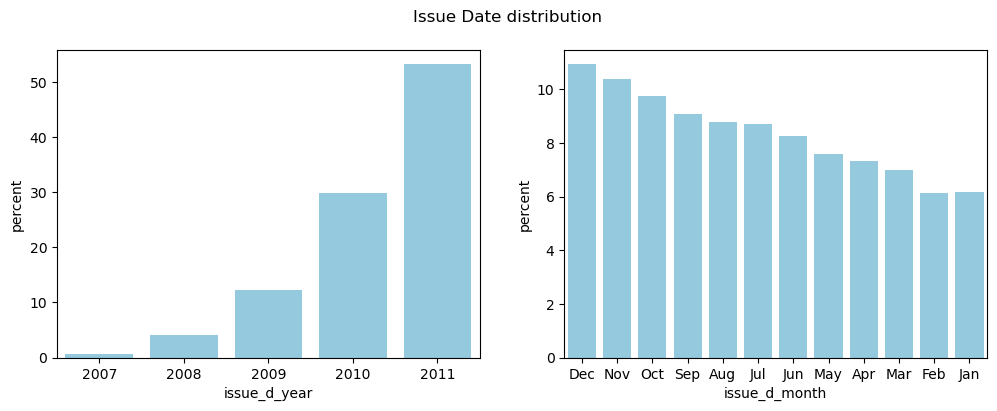

In [390]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#CountPlot
sns.countplot(data = loan,x = 'issue_d_year', stat="percent", color='skyblue')
plt.subplot(1,2,2)
#Count plot
sns.countplot(data = loan,x = 'issue_d_month', stat="percent", color='skyblue')
#Single title for both subplots.

plt.suptitle('Issue Date distribution')
plt.show()


### Observation
1. over a period of time lending club has almost doubled the loan disbursement very year
2. last 3 months of the year Oct to Dec the issue rate is high

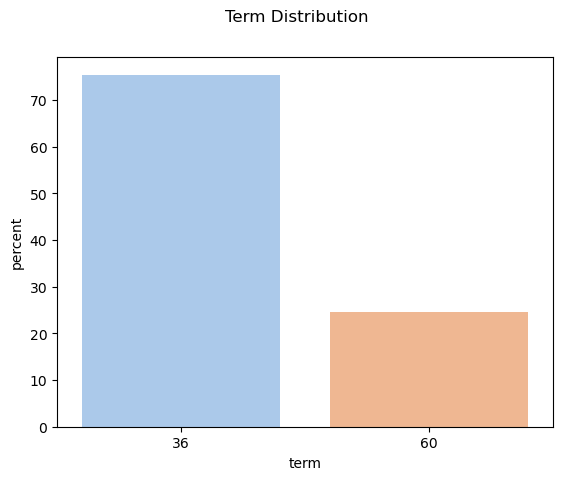

In [391]:
#Increasing the figure size of plot
sns.countplot(data = loan,x = 'term', stat="percent", palette = 'pastel')
plt.suptitle('Term Distribution')
plt.show()


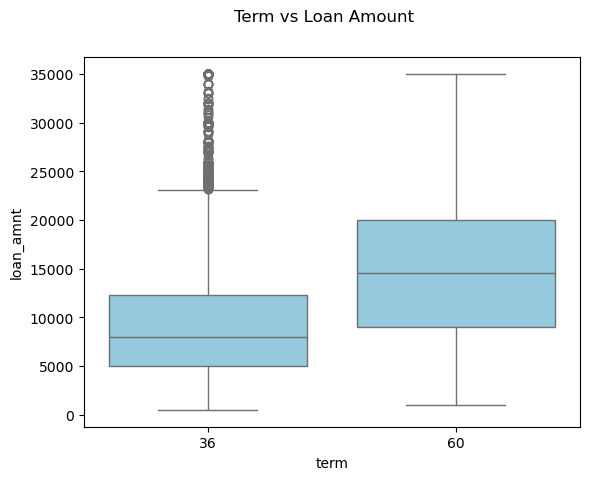

In [392]:
sns.boxplot(x = loan.term, y=loan.loan_amnt,color='skyblue')
plt.suptitle('Term vs Loan Amount')
plt.show()

### Observation
75% of issue loan is for 36 months term & 25% is for 60 months term

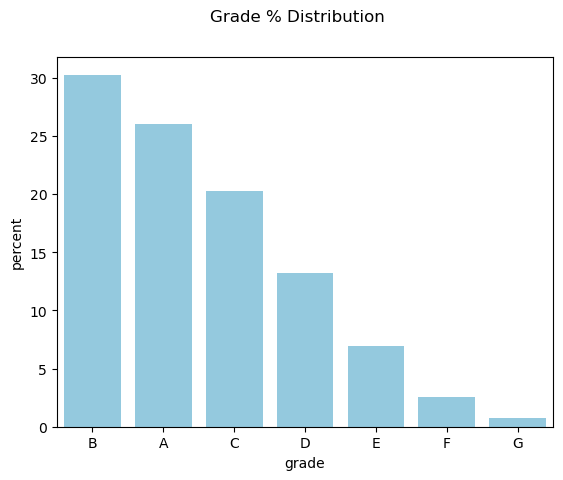

In [393]:
#Increasing the figure size of plot
sns.countplot(data = loan,x = 'grade', stat="percent", color='skyblue', 
              order = loan['grade'].value_counts().index)
plt.suptitle('Grade % Distribution')
plt.show()


In [394]:
round(loan['grade'].value_counts(normalize=True)*100,0)

B    30.0
A    26.0
C    20.0
D    13.0
E     7.0
F     3.0
G     1.0
Name: grade, dtype: float64

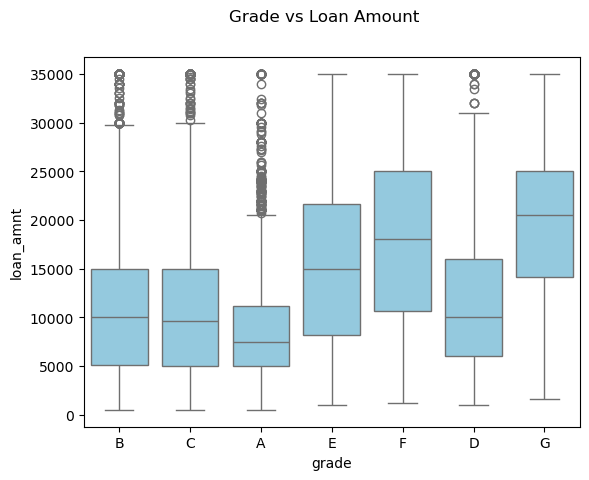

In [395]:
sns.boxplot(x = loan.grade, y=loan.loan_amnt,color='skyblue')
plt.suptitle('Grade vs Loan Amount')
plt.show()

### Observation
**56%** borrower are from **Grade A & B**

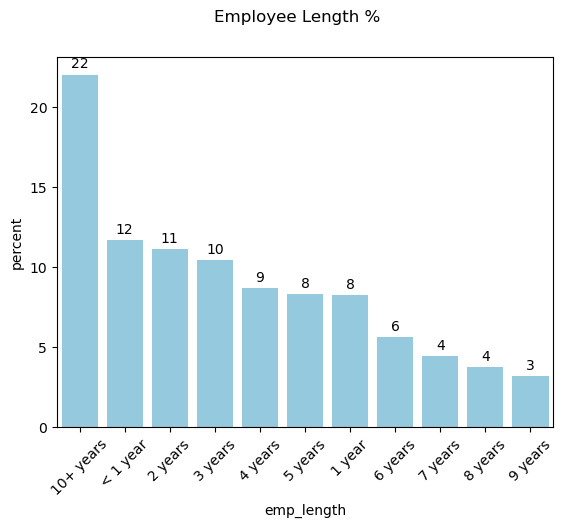

In [396]:
#Increasing the figure size of plot
ax = sns.countplot(data = loan,x = 'emp_length', stat="percent", color='skyblue', 
              order = loan['emp_length'].value_counts().index)
plt.suptitle('Employee Length %')
plt.xticks(rotation=45)
for bar in ax.patches:
    plt.annotate(round(bar.get_height()),
                 (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()),
                 ha='center', va='center',
                 xytext=(0, 8),
                 textcoords='offset points')
plt.show()


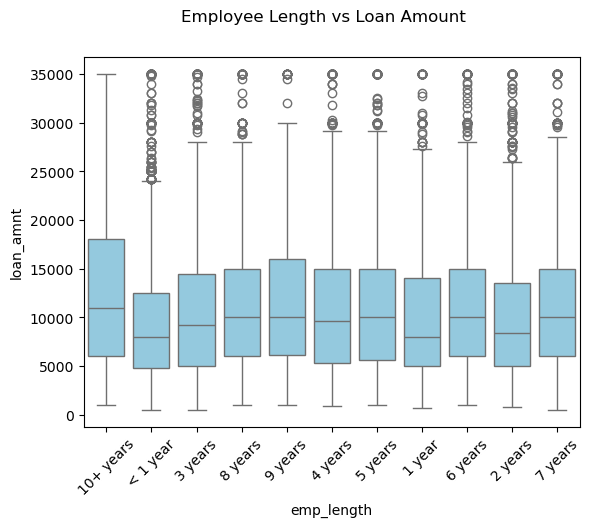

In [397]:
sns.boxplot(x = loan.emp_length, y=loan.loan_amnt,color='skyblue')
plt.suptitle('Employee Length vs Loan Amount')
plt.xticks(rotation=45)
plt.show()

### Observation
Most of the borrower are of **10+ Years** Lenght

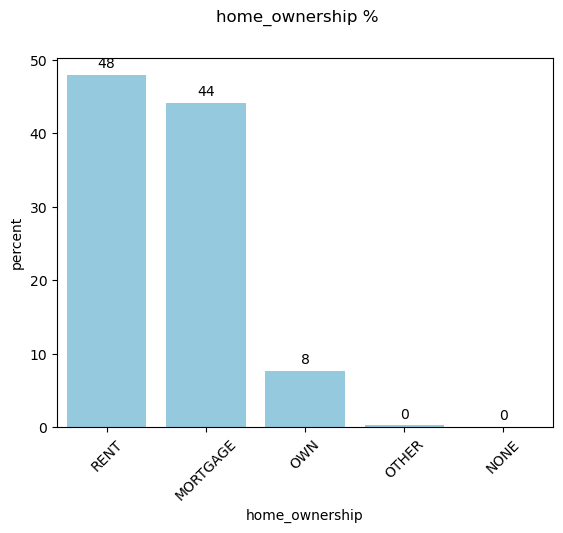

In [398]:
#Increasing the figure size of plot
ax = sns.countplot(data = loan,x = 'home_ownership', stat="percent", color='skyblue', 
              order = loan['home_ownership'].value_counts().index)
plt.suptitle('home_ownership %')
plt.xticks(rotation=45)
for bar in ax.patches:
    plt.annotate(round(bar.get_height()),
                 (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()),
                 ha='center', va='center',
                 xytext=(0, 8),
                 textcoords='offset points')
plt.show()


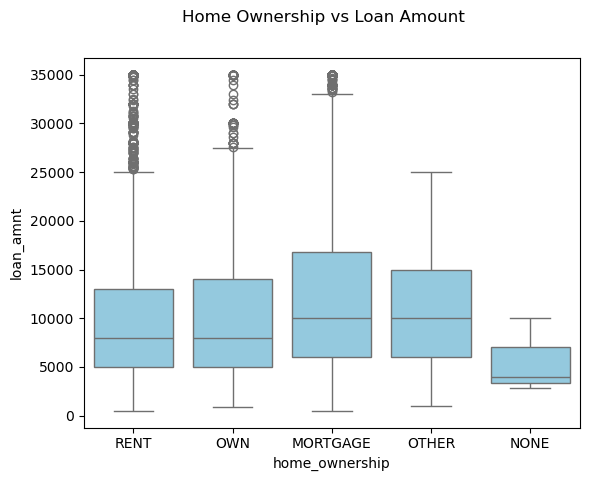

In [399]:
sns.boxplot(x = loan.home_ownership, y=loan.loan_amnt,color='skyblue')
plt.suptitle('Home Ownership vs Loan Amount')
plt.xticks(rotation=0)
plt.show()

### Observation
**92%** of the borrower are have having **Rent & Mortgage** 

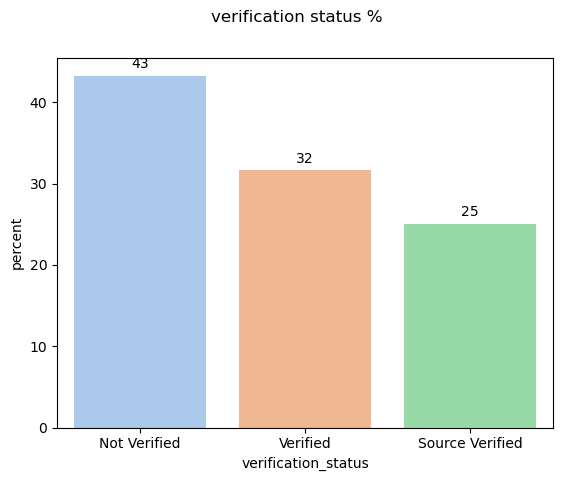

In [400]:
#Increasing the figure size of plot
ax = sns.countplot(data = loan,x = 'verification_status', stat="percent", palette = 'pastel', 
              order = loan['verification_status'].value_counts().index)
plt.suptitle('verification status %')
plt.xticks(rotation=0)
for bar in ax.patches:
    plt.annotate(round(bar.get_height()),
                 (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()),
                 ha='center', va='center',
                 xytext=(0, 8),
                 textcoords='offset points')
plt.show()


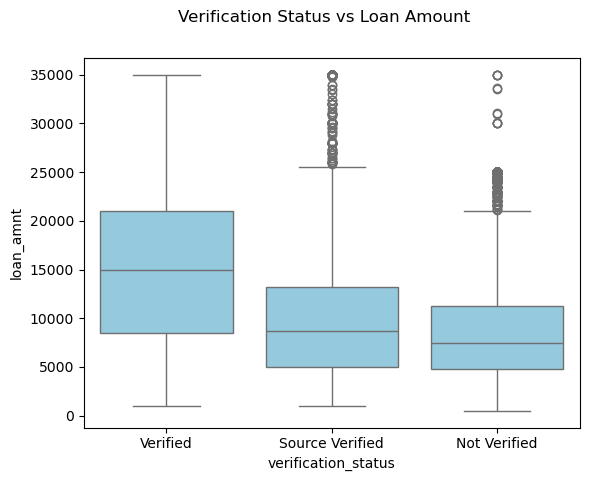

In [401]:
sns.boxplot(x = loan.verification_status, y=loan.loan_amnt,color='skyblue')
plt.suptitle('Verification Status vs Loan Amount')
plt.xticks(rotation=0)
plt.show()

### Observation
**43%** of the loans are issued **without Verification**

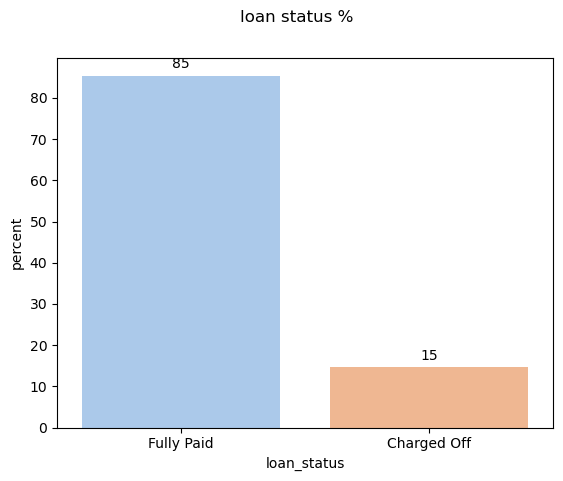

In [402]:
#Increasing the figure size of plot
ax = sns.countplot(data = loan,x = 'loan_status', stat="percent", palette = 'pastel', 
              order = loan['loan_status'].value_counts().index)
plt.suptitle('loan status %')
plt.xticks(rotation=0)
for bar in ax.patches:
    plt.annotate(round(bar.get_height()),
                 (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()),
                 ha='center', va='center',
                 xytext=(0, 8),
                 textcoords='offset points')
plt.show()


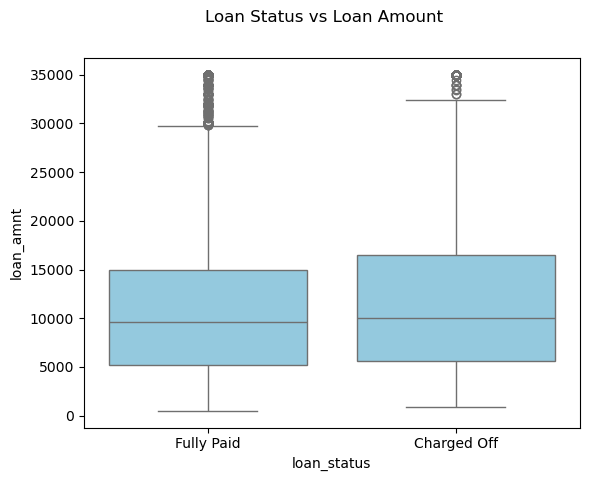

In [403]:
sns.boxplot(x = loan.loan_status, y=loan.loan_amnt,color='skyblue')
plt.suptitle('Loan Status vs Loan Amount')
plt.xticks(rotation=0)
plt.show()

### Observation
**85%** of the borrower **fully paid** the load and **15%** of the **Defaulted**

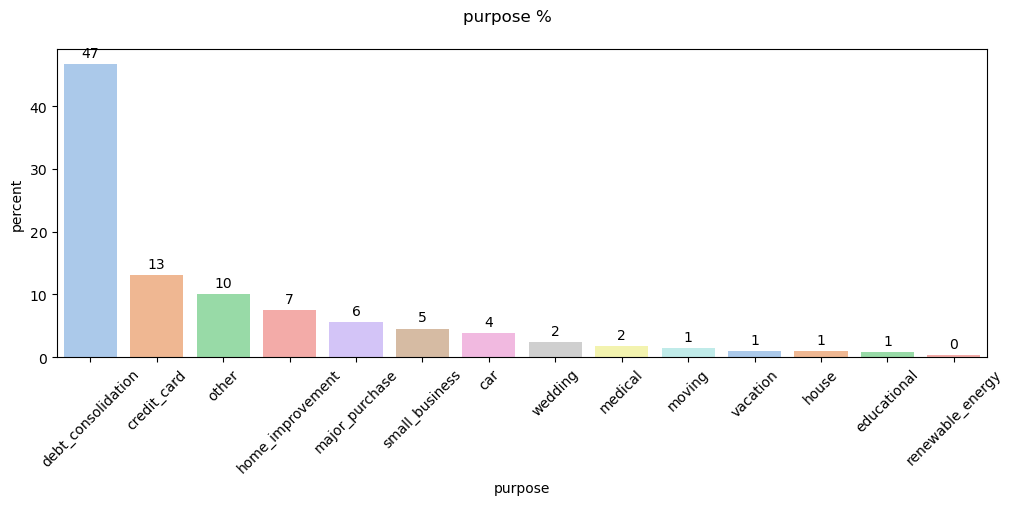

In [404]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
ax = sns.countplot(data = loan,x = 'purpose', stat="percent", palette = 'pastel', 
              order = loan['purpose'].value_counts().index)
plt.suptitle('purpose %')
plt.xticks(rotation=45)
for bar in ax.patches:
    plt.annotate(round(bar.get_height()),
                 (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()),
                 ha='center', va='center',
                 xytext=(0, 8),
                 textcoords='offset points')
plt.show()


### Observation
1. **47%** of people took loan for Debt Consolidation
2. followed by **13%** for Credit Card Payment

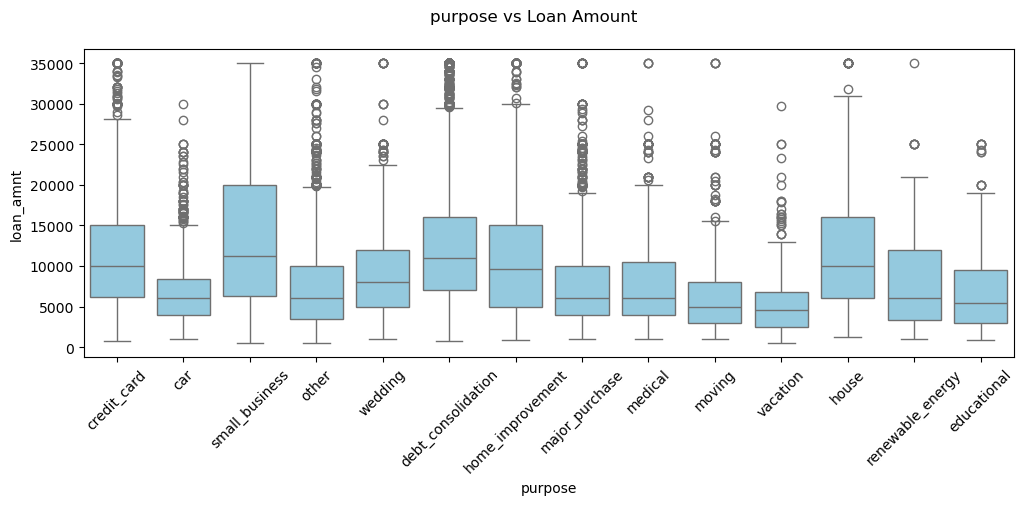

In [405]:
plt.figure(figsize=(12,4))
sns.boxplot(x = loan.purpose, y=loan.loan_amnt,color='skyblue')
plt.suptitle('purpose vs Loan Amount')
plt.xticks(rotation=45)
plt.show()

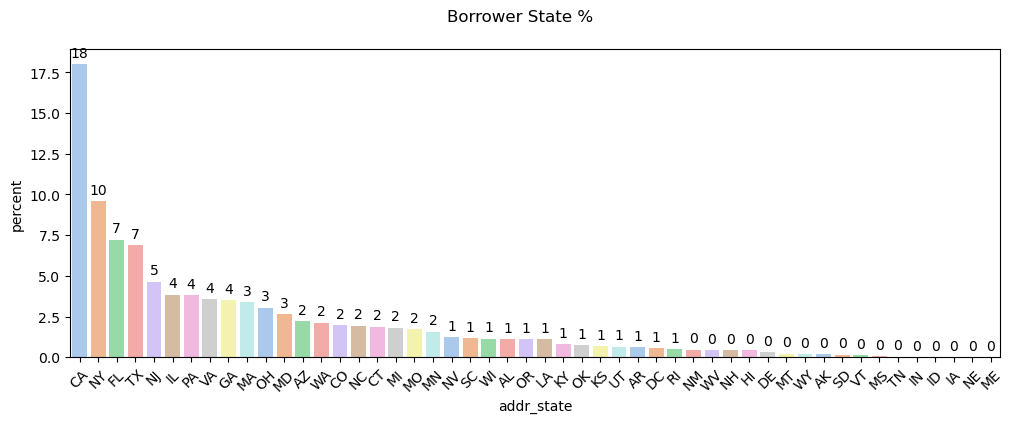

In [406]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
ax = sns.countplot(data = loan,x = 'addr_state', stat="percent", palette = 'pastel', 
              order = loan['addr_state'].value_counts().index)
plt.suptitle('Borrower State %')
plt.xticks(rotation=45)
for bar in ax.patches:
    plt.annotate(round(bar.get_height()),
                 (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()),
                 ha='center', va='center',
                 xytext=(0, 8),
                 textcoords='offset points')
plt.show()


### Observation
1. **18%** of people who took loan are from California State
2. followed by **10%** from New York

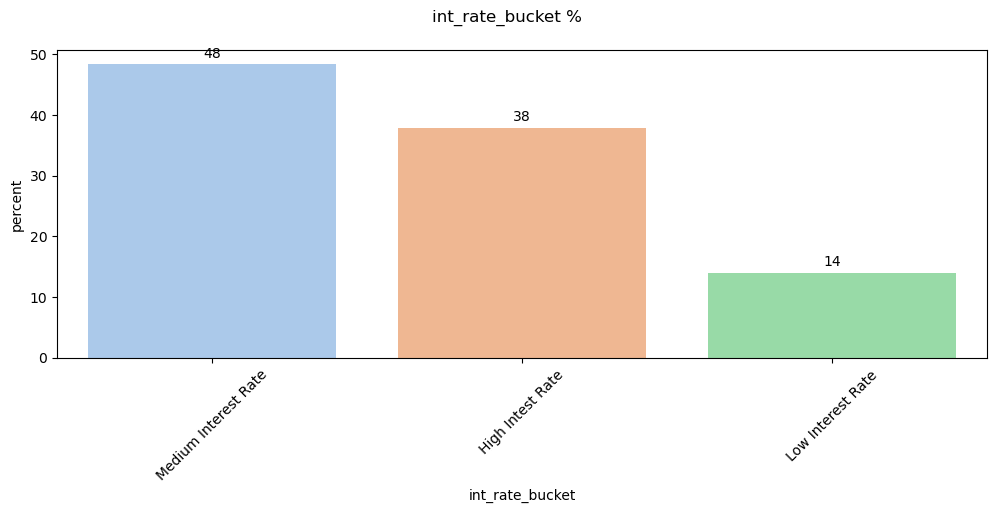

In [407]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
ax = sns.countplot(data = loan,x = 'int_rate_bucket', stat="percent", palette = 'pastel', 
              order = loan['int_rate_bucket'].value_counts().index)
plt.suptitle('int_rate_bucket %')
plt.xticks(rotation=45)
for bar in ax.patches:
    plt.annotate(round(bar.get_height()),
                 (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()),
                 ha='center', va='center',
                 xytext=(0, 8),
                 textcoords='offset points')
plt.show()


### Observation
1. **48%** of people have taken medium interest rate loan
2. Only **14%** have borrower has taken low interest rate

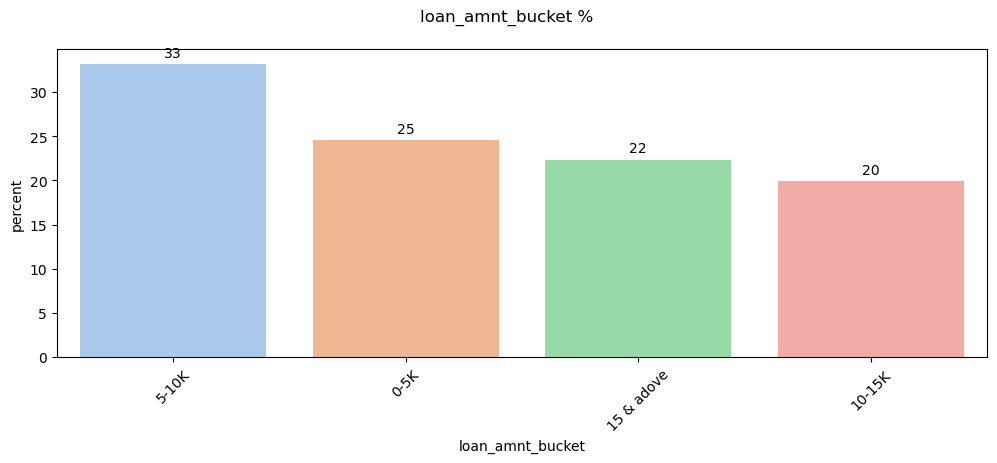

In [408]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
ax = sns.countplot(data = loan,x = 'loan_amnt_bucket', stat="percent", palette = 'pastel', 
              order = loan['loan_amnt_bucket'].value_counts().index)
plt.suptitle('loan_amnt_bucket %')
plt.xticks(rotation=45)
for bar in ax.patches:
    plt.annotate(round(bar.get_height()),
                 (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()),
                 ha='center', va='center',
                 xytext=(0, 8),
                 textcoords='offset points')
plt.show()


### Observation
1. **58%** of people have taken loan in range of **0-10K**
2. Only **22%** have tkaen loan above 15K

# Univariate Analysis Summary
* **92%** of the borrower are have having **Rent & Mortgage**
* More number of people have taken loan in range of **10K** as **mean is 9600**
* **43%** of the loans are issued **without Verification**

# Bivariate Analysis


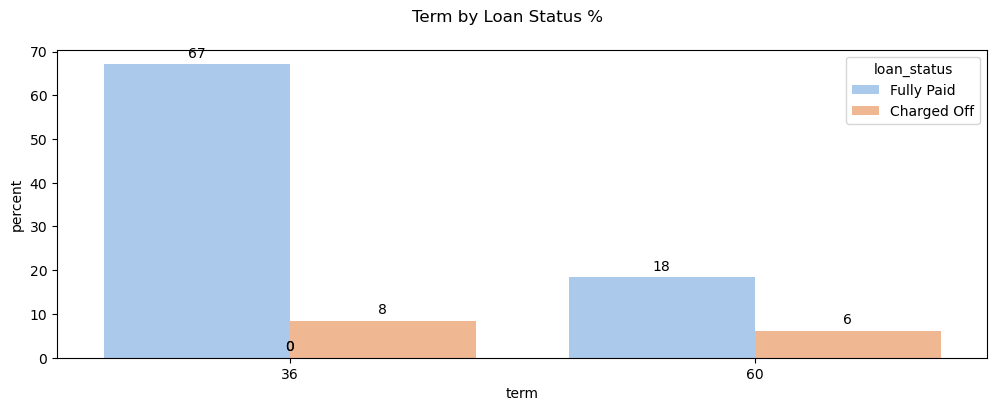

In [409]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
ax = sns.countplot(data = loan,x = 'term', stat="percent", palette = 'pastel', 
              order = loan['term'].value_counts().index, hue='loan_status')
plt.suptitle('Term by Loan Status %')
plt.xticks(rotation=0)
for bar in ax.patches:
    plt.annotate(round(bar.get_height()),
                 (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()),
                 ha='center', va='center',
                 xytext=(0, 8),
                 textcoords='offset points')
plt.show()


### Observation
1. Overall percentage of Default is little higher **8%** for Term **36 months** vs **6%** for **60 Months**

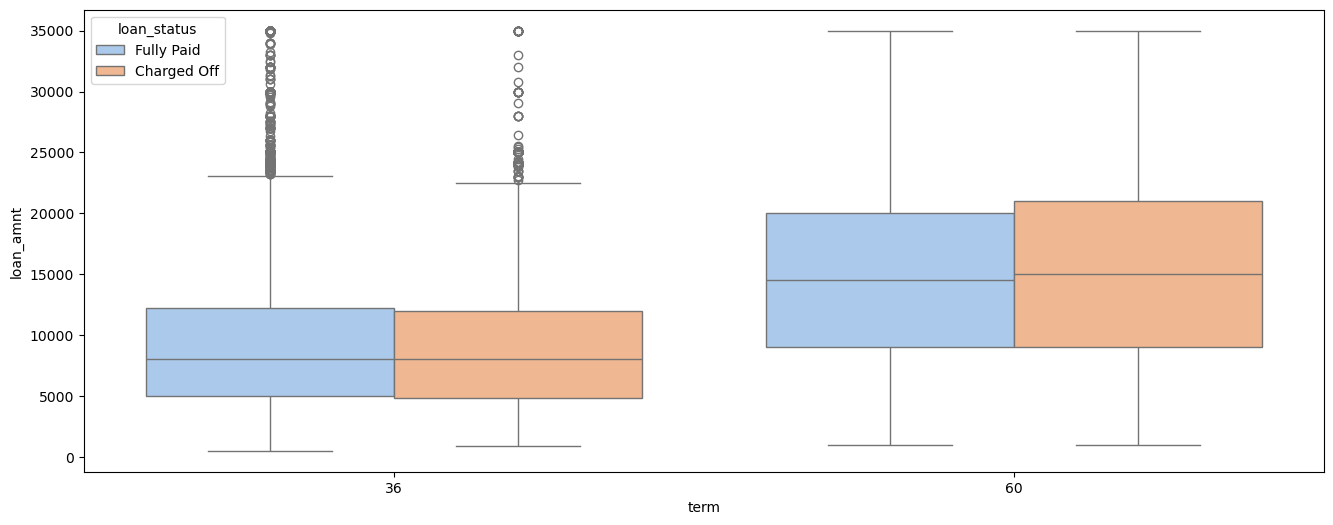

In [410]:
plt.figure(figsize=(16,6))
sns.boxplot(y=loan.loan_amnt,x=loan.term,hue=loan.loan_status,palette = 'pastel',order = loan['term'].value_counts().index)
plt.xticks(rotation=0)
plt.show()

### Observation
1. People with **high loan amount** has mostly opted for **60 months** term

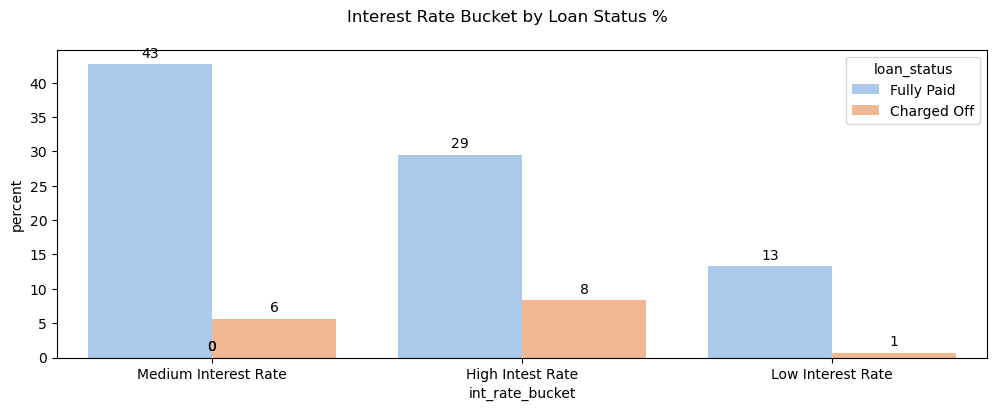

In [411]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
ax = sns.countplot(data = loan,x = 'int_rate_bucket', stat="percent", palette = 'pastel', 
              order = loan['int_rate_bucket'].value_counts().index, hue='loan_status')
plt.suptitle('Interest Rate Bucket by Loan Status %')
plt.xticks(rotation=0)
for bar in ax.patches:
    plt.annotate(round(bar.get_height()),
                 (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()),
                 ha='center', va='center',
                 xytext=(0, 8),
                 textcoords='offset points')
plt.show()


### Observation
1. Overall percentage of Defaulter is little higher **8%** for **high interest rate bucket** followed by **Medium - 6%** 
2. Only **1%** defaulted for low interest bucket, means there is very less risk in giving loans in low interest rate bucket


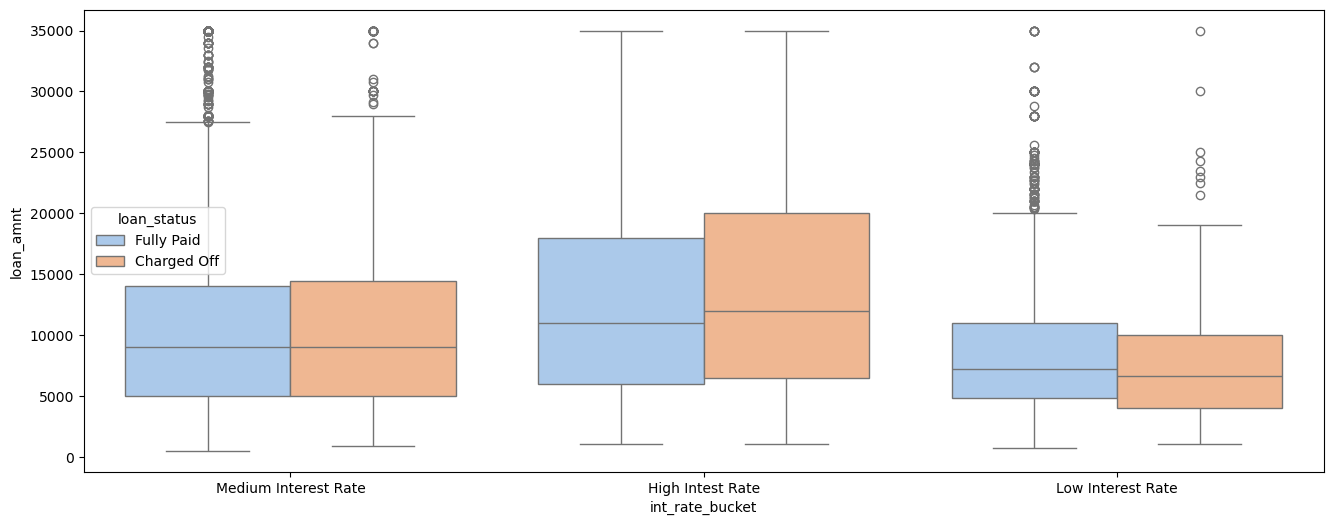

In [412]:
plt.figure(figsize=(16,6))
sns.boxplot(y=loan.loan_amnt,x=loan.int_rate_bucket,hue=loan.loan_status,palette = 'pastel',order = loan['int_rate_bucket'].value_counts().index)
plt.xticks(rotation=0)
plt.show()

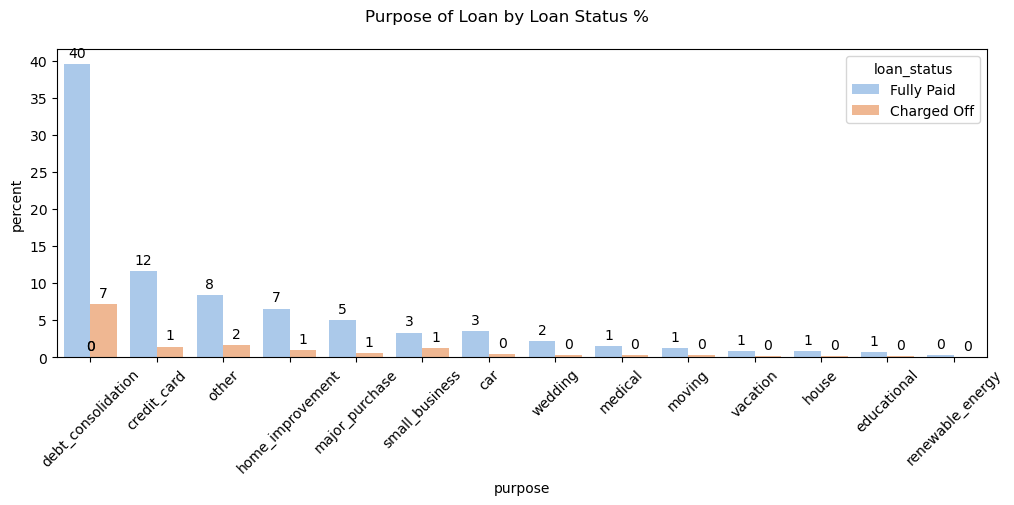

In [413]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
ax = sns.countplot(data = loan,x = 'purpose', stat="percent", palette = 'pastel', 
              order = loan['purpose'].value_counts().index, hue='loan_status')
plt.suptitle('Purpose of Loan by Loan Status %')
plt.xticks(rotation=45)
for bar in ax.patches:
    plt.annotate(round(bar.get_height()),
                 (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()),
                 ha='center', va='center',
                 xytext=(0, 8),
                 textcoords='offset points')
plt.show()


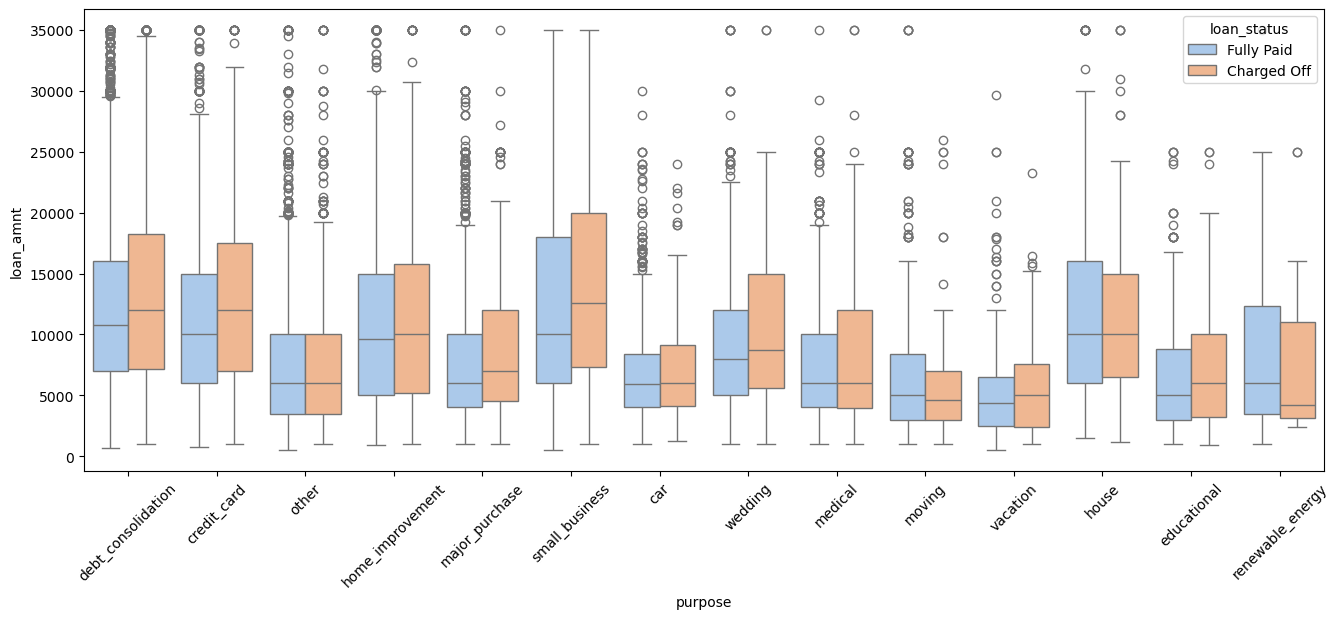

In [414]:
plt.figure(figsize=(16,6))
sns.boxplot(y=loan.loan_amnt,x=loan.purpose,hue=loan.loan_status,palette = 'pastel',order = loan['purpose'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

### Observation
1. Out of total **47%**, **7%** of borrrower who took loan for **debt consolidation defaulted**
2. higest loan amounts ranges are in **small business, debt consolidaiton & home improvements**
3. higest probablity of defaulting is **small business** but the volume is very small

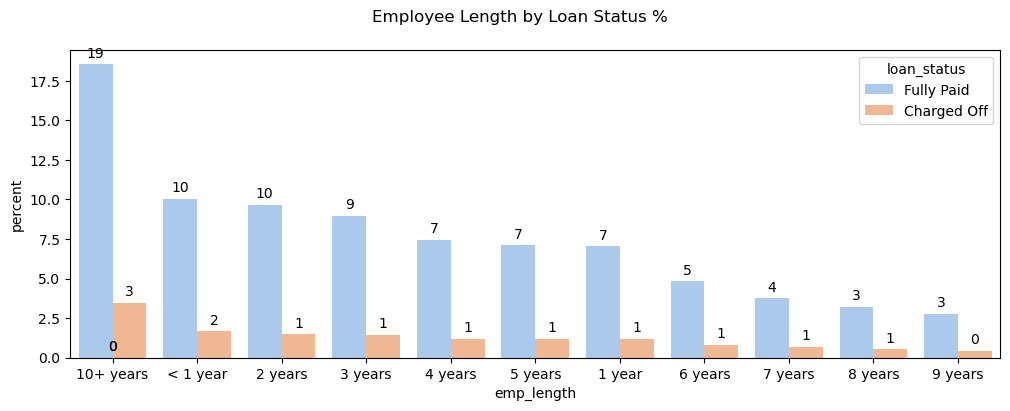

In [415]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
ax = sns.countplot(data = loan,x = 'emp_length', stat="percent", palette = 'pastel', 
              order = loan['emp_length'].value_counts().index, hue='loan_status')
plt.suptitle('Employee Length by Loan Status %')
plt.xticks(rotation=0)
for bar in ax.patches:
    plt.annotate(round(bar.get_height()),
                 (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()),
                 ha='center', va='center',
                 xytext=(0, 8),
                 textcoords='offset points')
plt.show()


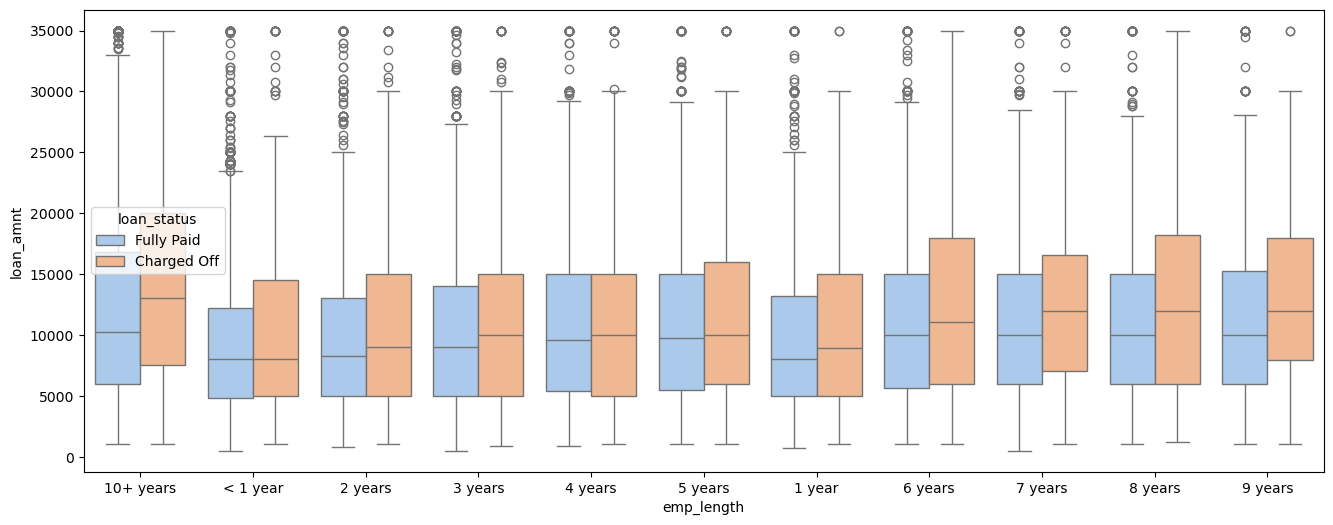

In [416]:
plt.figure(figsize=(16,6))
sns.boxplot(y=loan.loan_amnt,x=loan.emp_length,hue=loan.loan_status,palette = 'pastel',order = loan['emp_length'].value_counts().index)
plt.show()

### Observation
1. **Higher percentage-3%** of defaulter are with **10+ years** experince range
2. **Most of the defaulters** took higher loan amount in experince range of **6+ years**

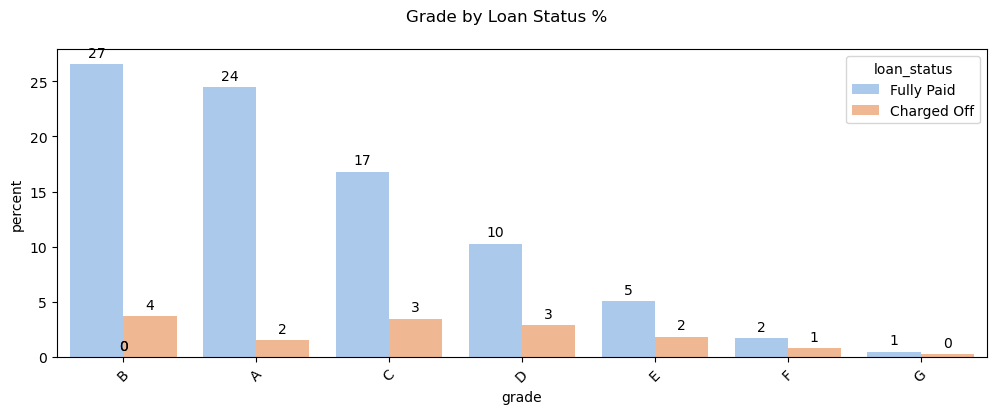

In [417]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
ax = sns.countplot(data = loan,x = 'grade', stat="percent", palette = 'pastel', 
              order = loan['grade'].value_counts().index, hue='loan_status')
plt.suptitle('Grade by Loan Status %')
plt.xticks(rotation=45)
for bar in ax.patches:
    plt.annotate(round(bar.get_height()),
                 (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()),
                 ha='center', va='center',
                 xytext=(0, 8),
                 textcoords='offset points')
plt.show()


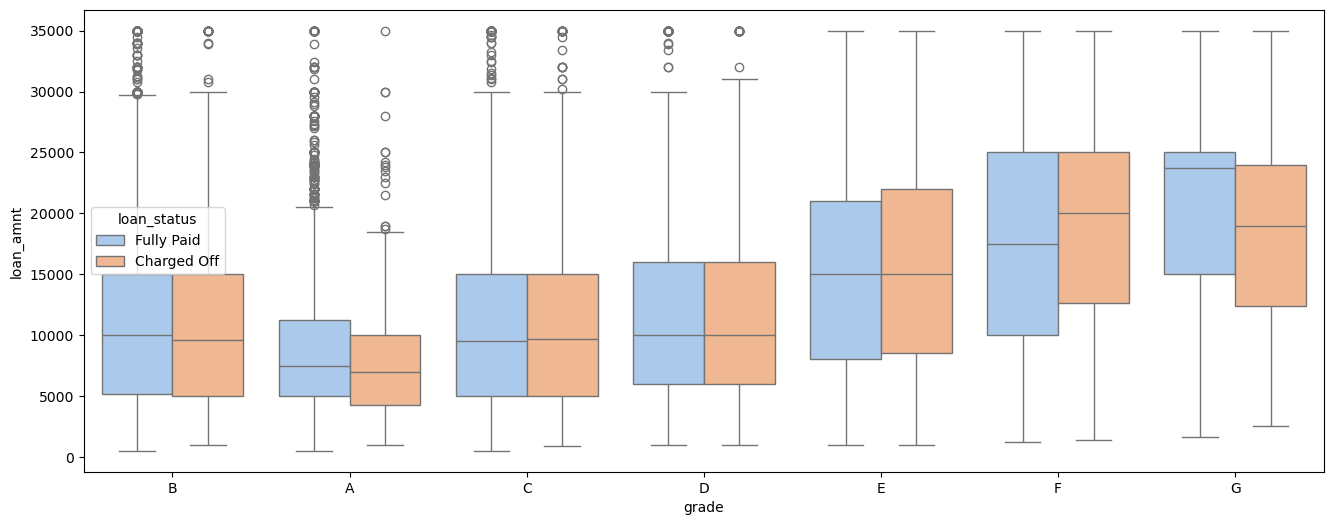

In [418]:
plt.figure(figsize=(16,6))
sns.boxplot(y=loan.loan_amnt,x=loan.grade,hue=loan.loan_status,palette = 'pastel',order = loan['grade'].value_counts().index)
plt.xticks(rotation=0)
plt.show()

In [419]:
# Check Loan Amount in Millions
loan.groupby(['grade','loan_status'])['loan_amnt'].sum()/1000000

grade  loan_status
A      Charged Off      4.695550
       Fully Paid      81.879875
B      Charged Off     15.540725
       Fully Paid     112.122875
C      Charged Off     14.876900
       Fully Paid      69.851875
D      Charged Off     13.644800
       Fully Paid      48.075750
E      Charged Off     11.332625
       Fully Paid      30.423525
F      Charged Off      6.147950
       Fully Paid      11.513000
G      Charged Off      1.872825
       Fully Paid       4.182825
Name: loan_amnt, dtype: float64

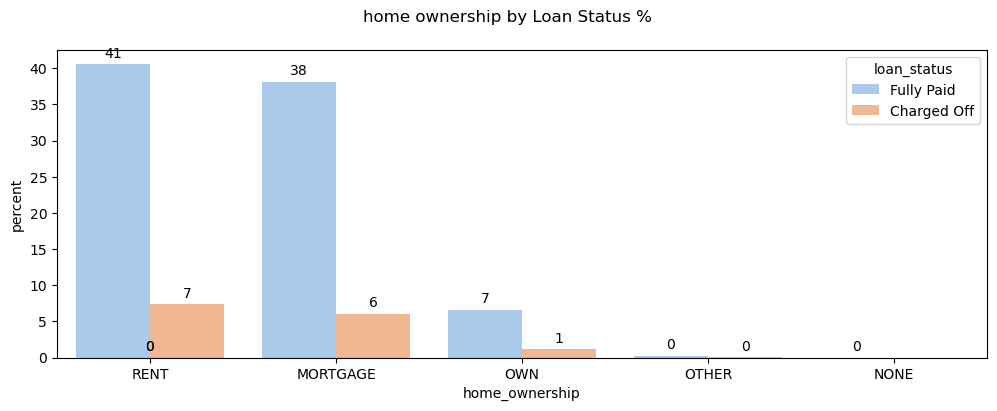

In [420]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
ax = sns.countplot(data = loan,x = 'home_ownership', stat="percent", palette = 'pastel', 
              order = loan['home_ownership'].value_counts().index, hue='loan_status')
plt.suptitle('home ownership by Loan Status %')
plt.xticks(rotation=0)
for bar in ax.patches:
    plt.annotate(round(bar.get_height()),
                 (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()),
                 ha='center', va='center',
                 xytext=(0, 8),
                 textcoords='offset points')
plt.show()


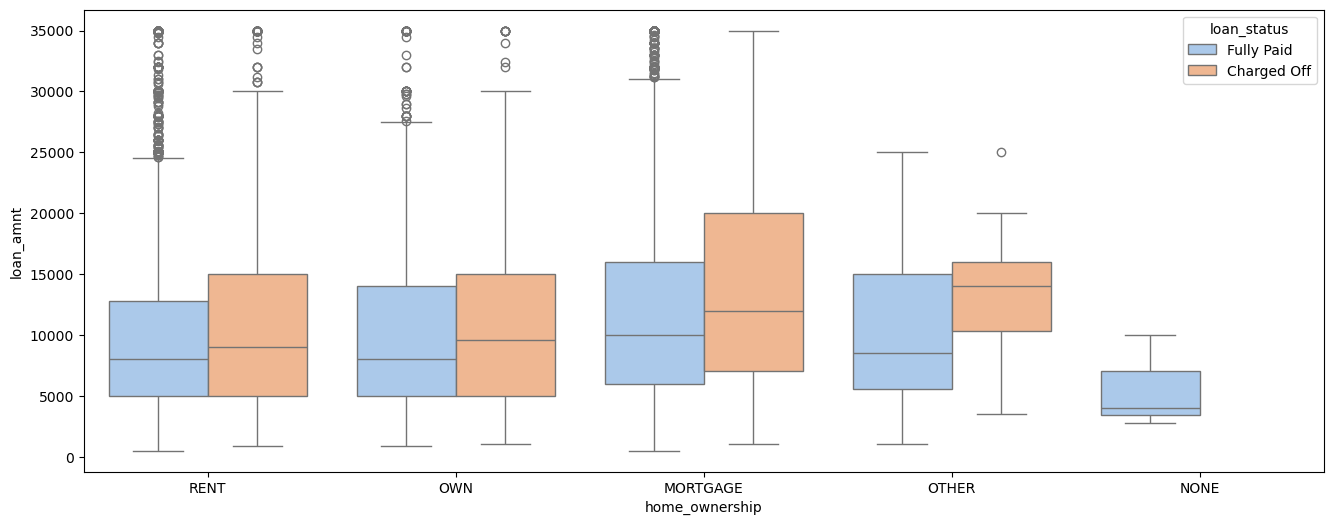

In [421]:
plt.figure(figsize=(16,6))
sns.boxplot(y=loan.loan_amnt,x=loan.home_ownership,hue=loan.loan_status,palette = 'pastel')
plt.show()

### Observation
1. total **13%** defaulter are staying in **Rental or Mortgage** 
2. Also, mostly borrower with higest loan amount in above two categories are defaulting most


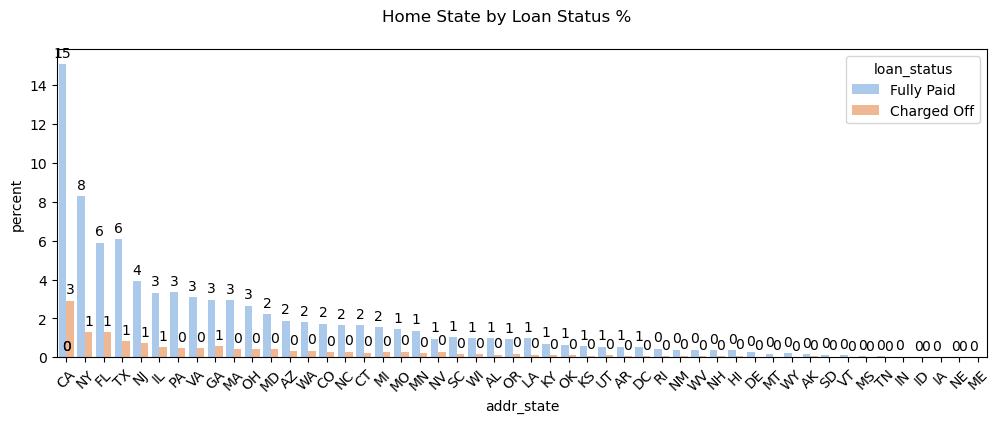

In [422]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
ax = sns.countplot(data = loan,x = 'addr_state', stat="percent", palette = 'pastel', 
              order = loan['addr_state'].value_counts().index, hue='loan_status')
plt.suptitle('Home State by Loan Status %')
plt.xticks(rotation=45)
for bar in ax.patches:
    plt.annotate(round(bar.get_height()),
                 (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()),
                 ha='center', va='center',
                 xytext=(0, 8),
                 textcoords='offset points')
plt.show()


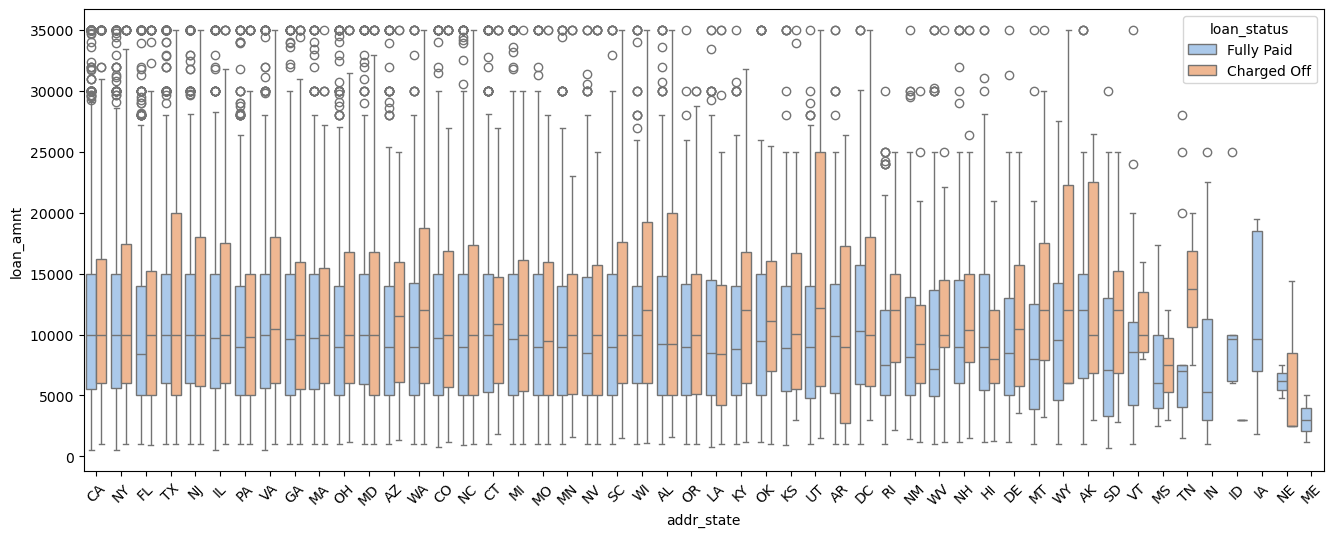

In [423]:
plt.figure(figsize=(16,6))
sns.boxplot(y=loan.loan_amnt,x=loan.addr_state,hue=loan.loan_status,palette = 'pastel',
           order = loan['addr_state'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

### Observation
1. total **3%** defaulter are from  **California** 
2. The probability of defaulting for a loan is more in following states **UT, AK, WY, AR**


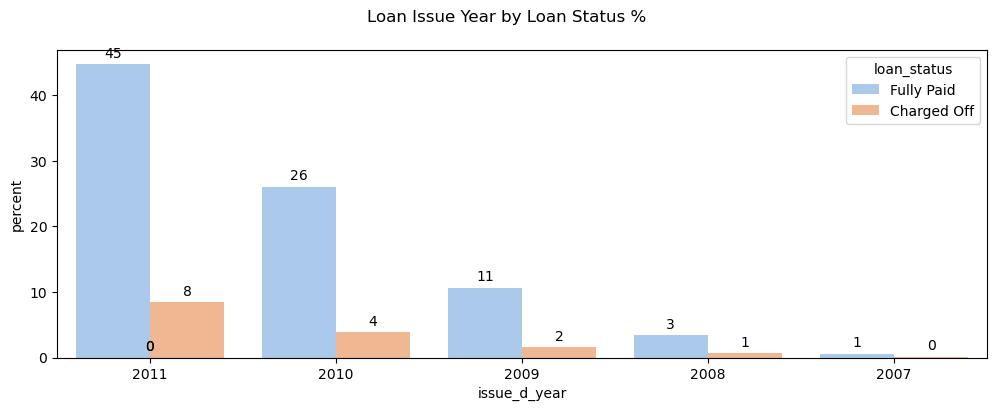

In [424]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
ax = sns.countplot(data = loan,x = 'issue_d_year', stat="percent", palette = 'pastel', 
              order = loan['issue_d_year'].value_counts().index, hue='loan_status')
plt.suptitle('Loan Issue Year by Loan Status %')
plt.xticks(rotation=0)
for bar in ax.patches:
    plt.annotate(round(bar.get_height()),
                 (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()),
                 ha='center', va='center',
                 xytext=(0, 8),
                 textcoords='offset points')
plt.show()


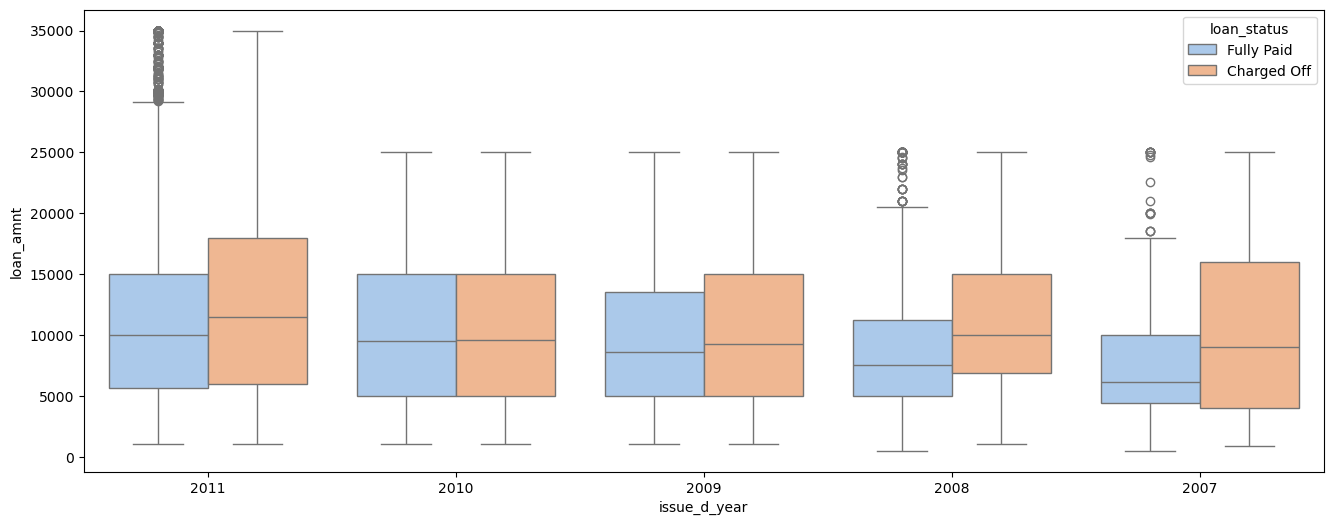

In [425]:
plt.figure(figsize=(16,6))
sns.boxplot(y=loan.loan_amnt,x=loan.issue_d_year,hue=loan.loan_status,palette = 'pastel',
           order = loan['issue_d_year'].value_counts().index)
plt.xticks(rotation=0)
plt.show()

### Observation
1. Most of the **default** happened when loan was taken during **2011 & 2010**, But the volume of load issues during those years were also high 
2. **most of the default** happened for the loans taken during **2007 followed by 2011**


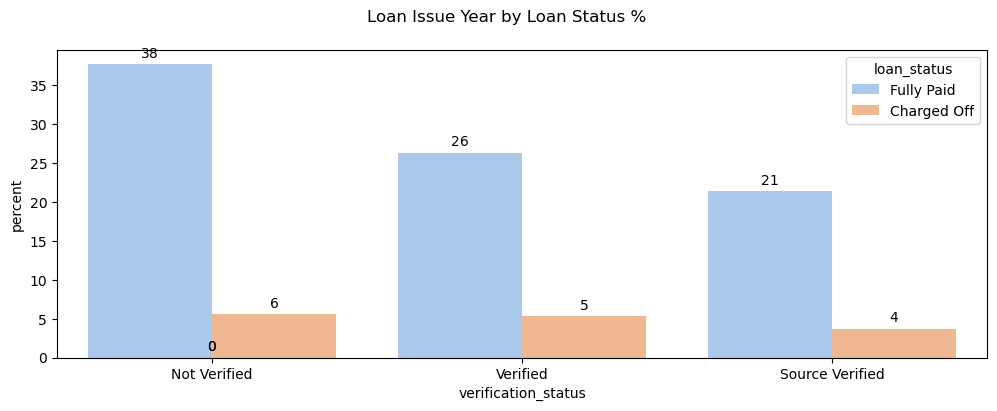

In [426]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
ax = sns.countplot(data = loan,x = 'verification_status', stat="percent", palette = 'pastel', 
              order = loan['verification_status'].value_counts().index, hue='loan_status')
plt.suptitle('Loan Issue Year by Loan Status %')
plt.xticks(rotation=0)
for bar in ax.patches:
    plt.annotate(round(bar.get_height()),
                 (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()),
                 ha='center', va='center',
                 xytext=(0, 8),
                 textcoords='offset points')
plt.show()


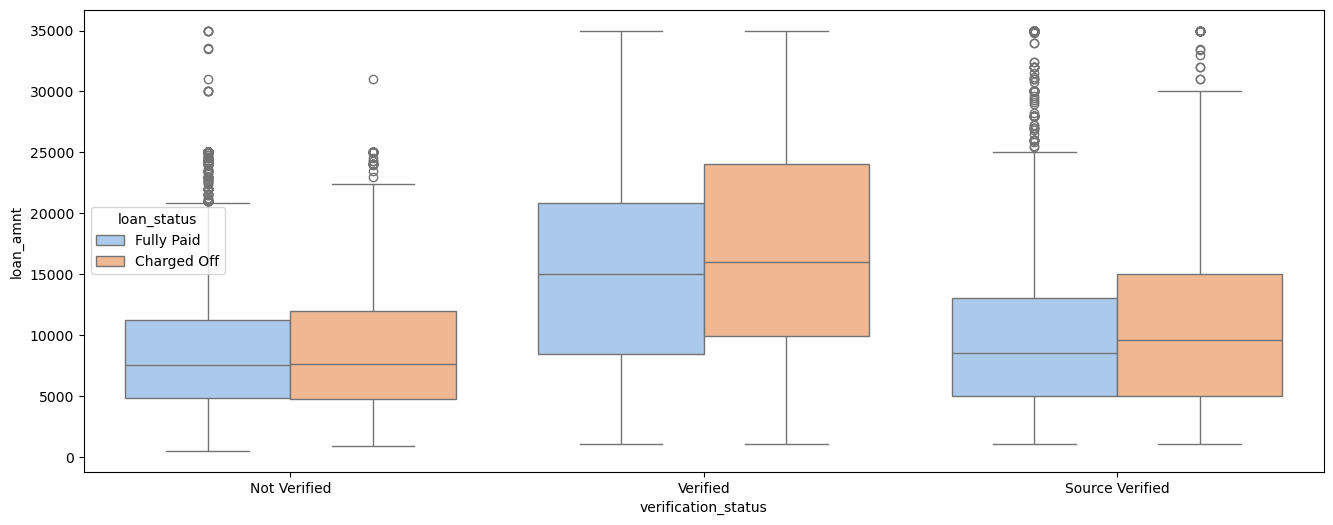

In [427]:
plt.figure(figsize=(16,6))
sns.boxplot(y=loan.loan_amnt,x=loan.verification_status,hue=loan.loan_status,palette = 'pastel',
           order = loan['verification_status'].value_counts().index)
plt.xticks(rotation=0)
plt.show()

### Observation
1. There is **not much difference in default rate** based on verification status 
2. **Verfied status** are given **more loan** compare to not verifed 


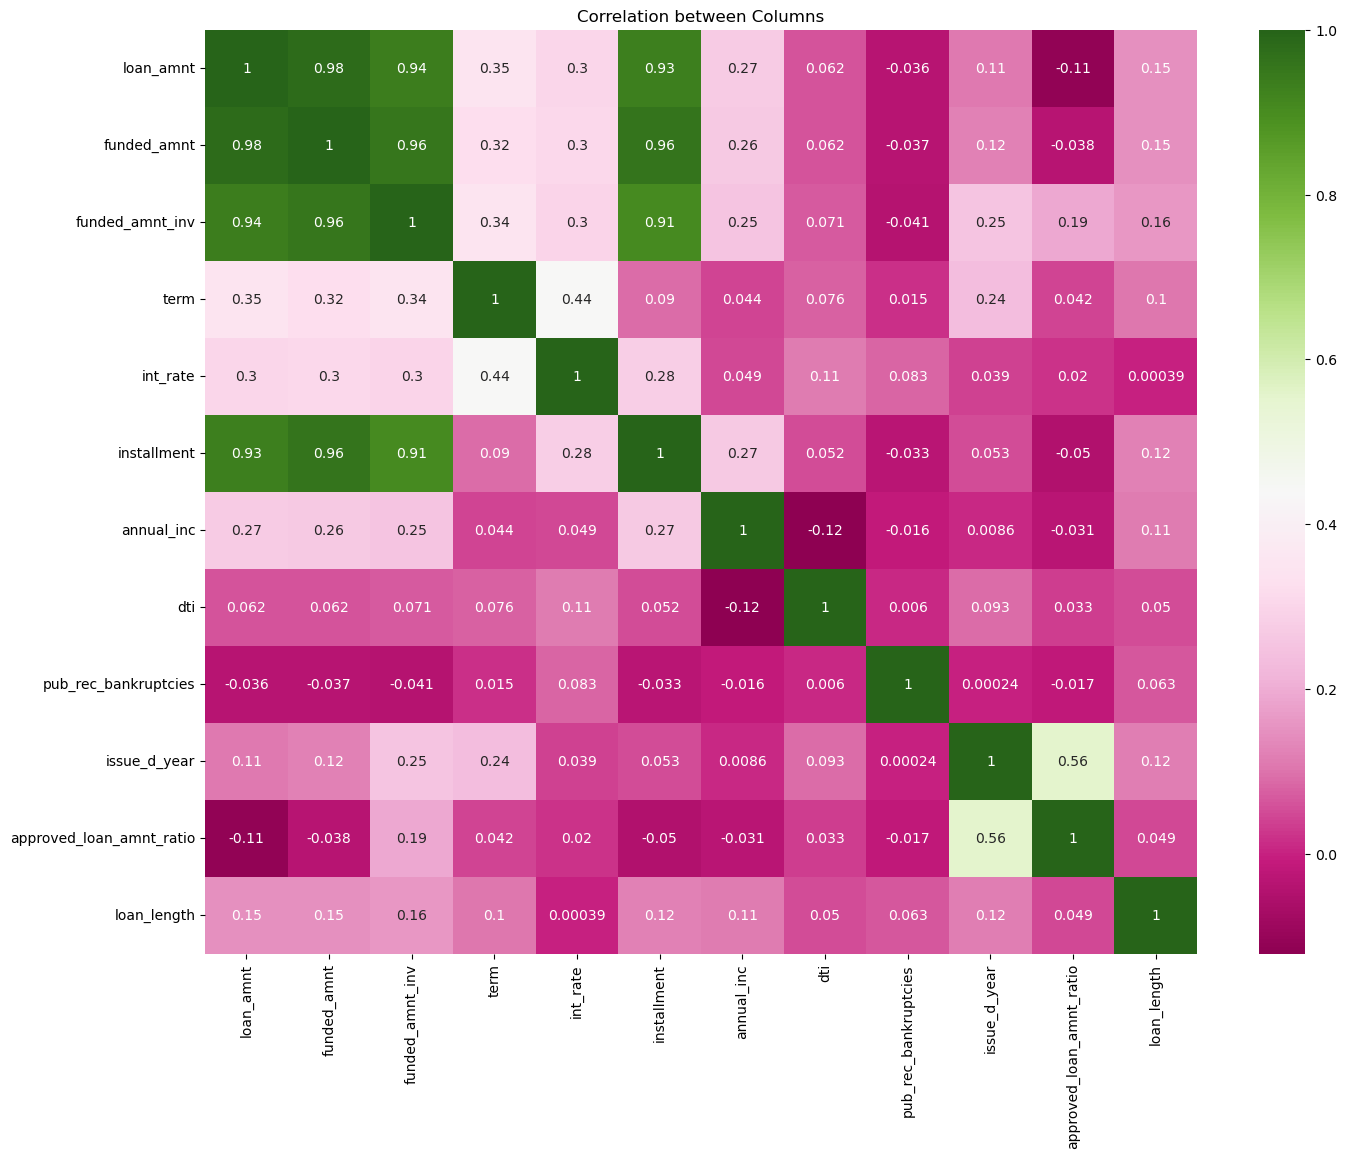

In [428]:
#Finding correlation matric
corr_matrix = loan.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot = True, cmap='PiYG')
plt.title("Correlation between Columns")
plt.show()

### Observation
1. There is **positive high corelation** between **installment** and **Loand Amount, Funded Amount & Funded Amount Investment** 


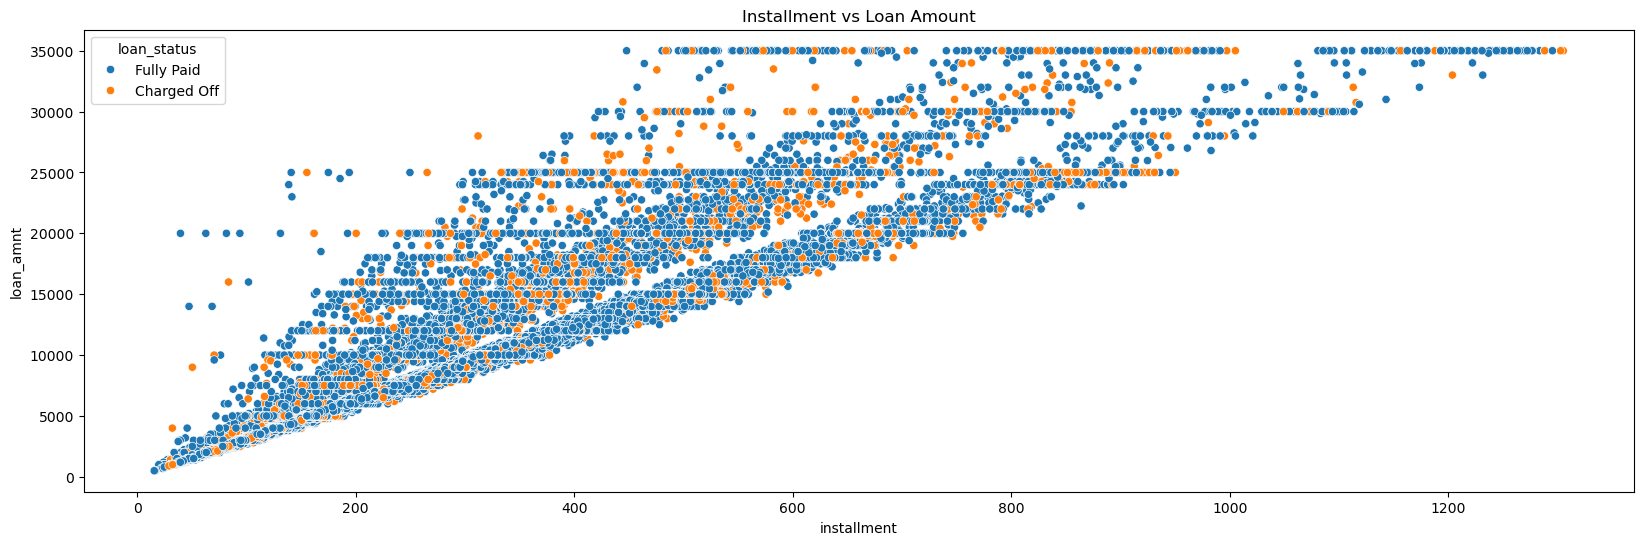

In [429]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='installment', y='loan_amnt', data=loan, hue='loan_status')
plt.title('Installment vs Loan Amount')
plt.show()

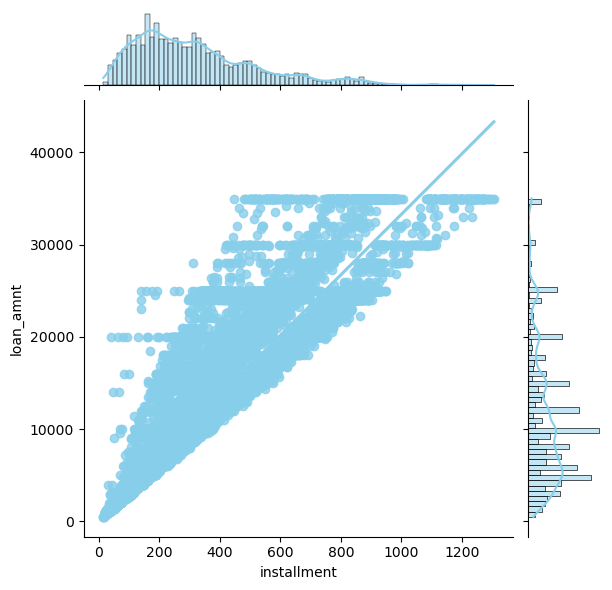

In [430]:
sns.jointplot(x='installment', y='loan_amnt', data=loan, kind="reg",color='skyblue')
plt.show()

<Figure size 1600x1200 with 0 Axes>

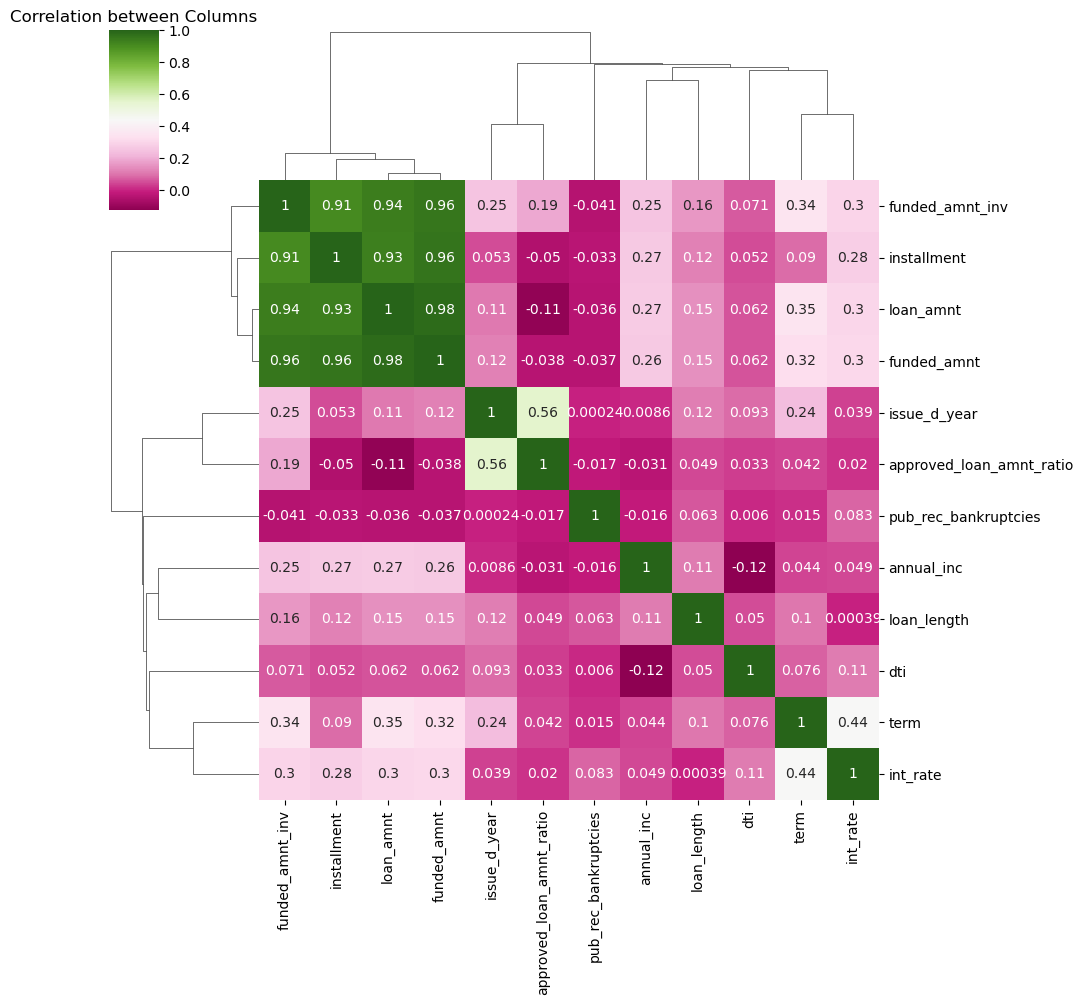

In [431]:
#Finding correlation matric
corr_matrix = loan.corr()
plt.figure(figsize=(16,12))
sns.clustermap(corr_matrix, annot = True, cmap='PiYG')
plt.title("Correlation between Columns")
plt.show()

### Observation
1. **Loan Amount** has strong corelation with **Funded Amount** & **Installment**
2. Rest of KPI's are not having any strong positive or negative corelations

<Figure size 1200x1200 with 0 Axes>

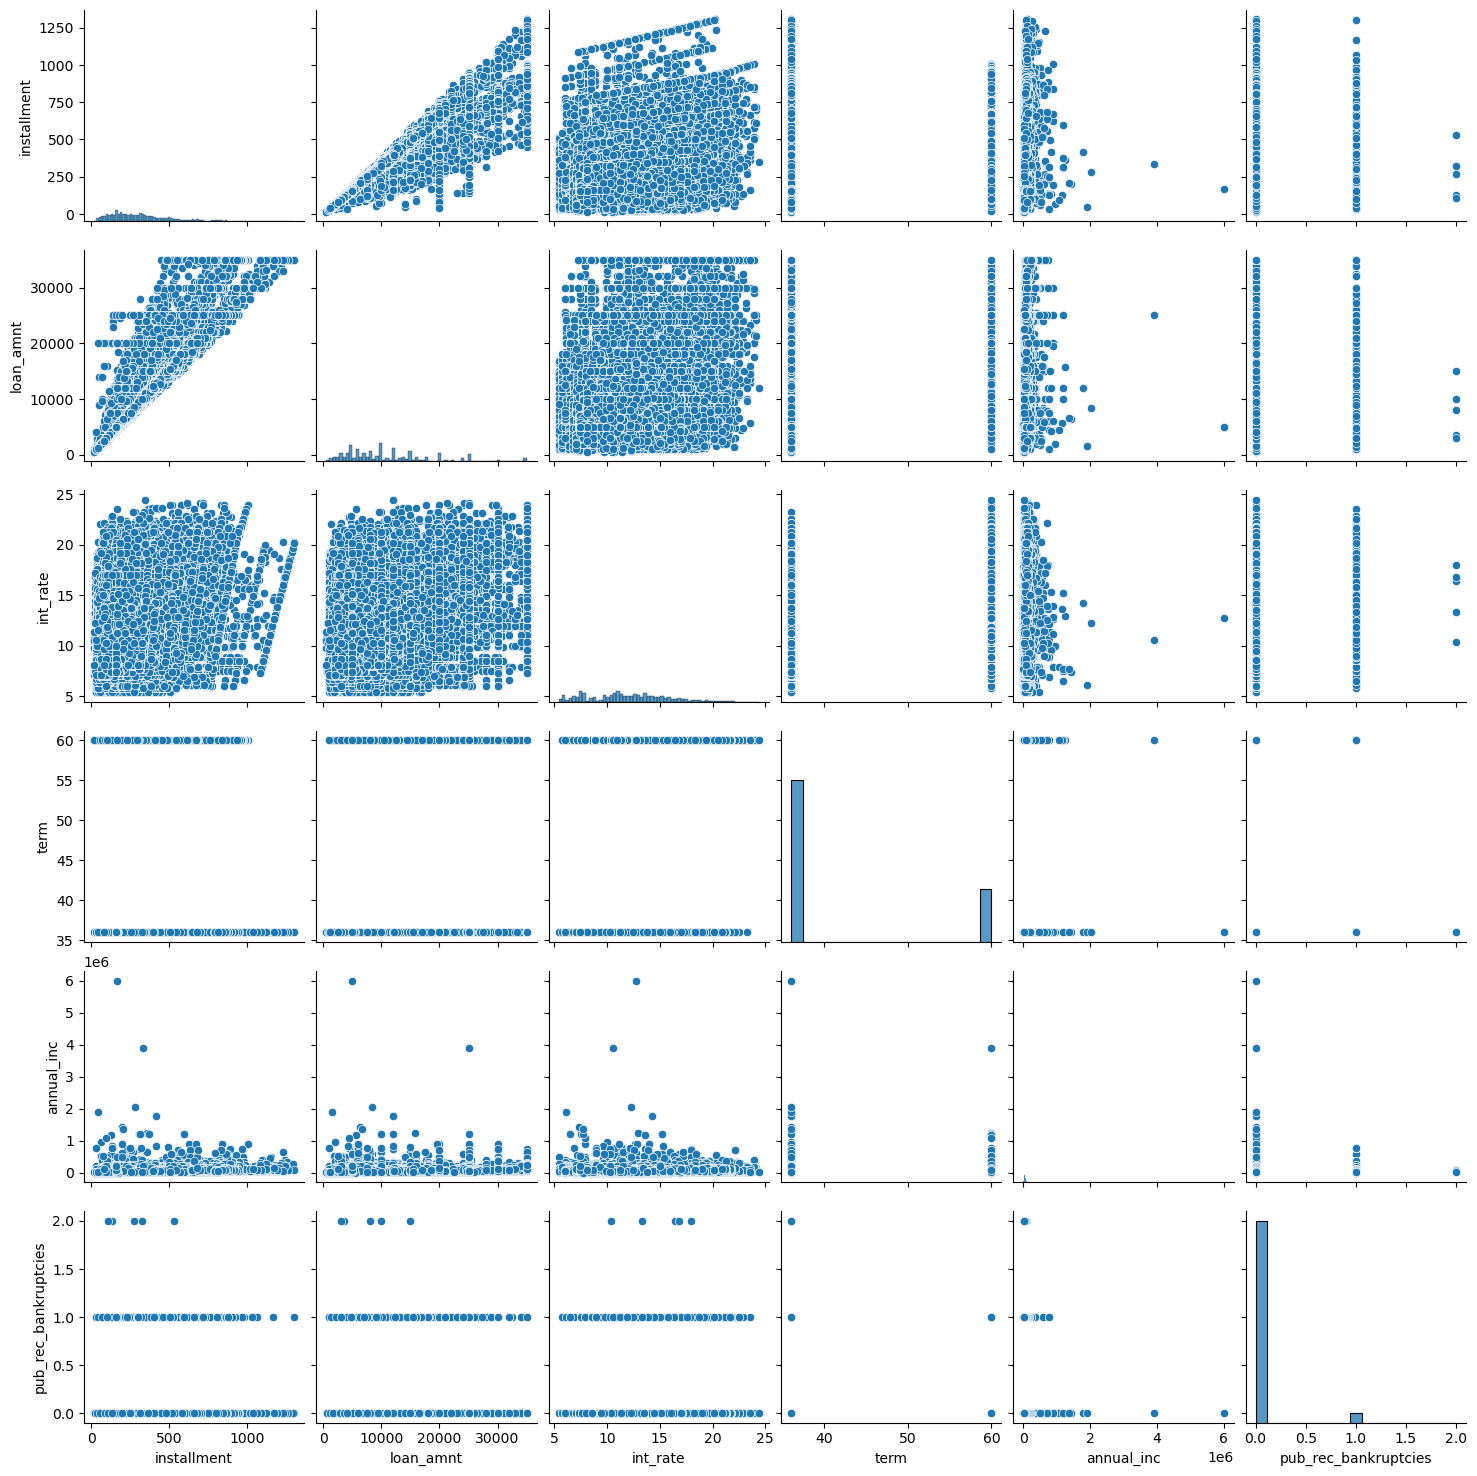

In [432]:
plt.figure(figsize=(12,12))
sns.pairplot(loan[['installment','loan_amnt', 'int_rate', 'term','annual_inc','pub_rec_bankruptcies']])
plt.show()

In [433]:
['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'pub_rec_bankruptcies', 'issue_d_year', 'issue_d_month',
       'approved_loan_amnt_ratio', 'loan_amnt_bucket', 'loan_length',
       'loan_amnt_bin', 'int_rate_bucket'],
      dtype='object')

IndentationError: unexpected indent (3079426544.py, line 8)